In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Create dataset
Use Sam to extract proposals from input images (100 images) then for proposals with same regions as the ground truth masks, they are considered as positive sameple to the templates ( use the BlenderProc 42 templates), negative otherwise

Run through 100 images - then return positive proposals and negative proposals

Use IoU >0.5 to get the postive proposals

## 1.1 Extract positive proposals (the same ones as gt mask)

In [10]:
# from src.model.constrastive_learning import extract_dataset

# dataset="icbin"
# data_type="test"
# scene_id=1
# pos_proposals, neg_proposals = extract_dataset(dataset, data_type, scene_id) # Take 2.21 minutes

In [6]:
# all_pos_proposals = [item for sublist in pos_proposals for item in sublist]
# all_neg_proposals = [item for sublist in neg_proposals for item in sublist]

In [8]:
# import pickle

# with open('contrastive_learning/all_pos_proposals.pkl', 'wb') as file:
#     pickle.dump(all_pos_proposals, file)

# with open('contrastive_learning/all_neg_proposals.pkl', 'wb') as file:
#     pickle.dump(all_neg_proposals, file)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle


with open('contrastive_learning/all_pos_proposals.pkl', 'rb') as file:
    pos = pickle.load(file)

with open('contrastive_learning/all_neg_proposals.pkl', 'rb') as file:
    neg = pickle.load(file)

## 1.2 Create psotive and neagtive pairs
Positive pairs (positive proposal and template with most similar pose)

In [3]:
import os
os.environ['PYDEVD_WARN_EVALUATION_TIMEOUT'] = '10'
os.environ['PYDEVD_UNBLOCK_THREADS_TIMEOUT'] = '5'

In [7]:
import torch

from src.model.constrastive_learning import ContrastiveModel


template_paths = "datasets/bop23_challenge/datasets/templates_pyrender/icbin/obj_000001/*.png"
template_poses_path = "datasets/bop23_challenge/datasets/templates_pyrender/icbin/template_poses.npy"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ContrastiveModel(device)
# model.load_state_dict(torch.load("contrastive_learning/saved_checkpoints/best_model_checkpoint_008.pth"))


Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
[2024-08-15 15:46:14,256] [INFO] dinov2: using MLP layer as FFN


In [8]:
from src.model.constrastive_learning import train

train(device = device, model= model, template_paths=template_paths, template_poses_path=template_poses_path,
    all_pos_proposals=pos, all_neg_proposals=neg, num_epochs=50)

Training:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50 loss: 5.27445


Epoch 1/50 Validation Loss: 0.16223
best_val_loss:  0.16222567199211987
saving best model at epoch:  0


Training:   4%|▍         | 2/50 [02:46<1:06:05, 82.61s/it]

Epoch 2/50 loss: 0.18397


Training:   6%|▌         | 3/50 [04:05<1:03:20, 80.87s/it]

Epoch 3/50 loss: 0.15096


Epoch 4/50 loss: 0.13612


Epoch 4/50 Validation Loss: 0.09796
best_val_loss:  0.09795500824434888
saving best model at epoch:  3


Training:  10%|█         | 5/50 [06:49<1:00:54, 81.20s/it]

Epoch 5/50 loss: 0.11935


Epoch 6/50 loss: 0.11044


Training:  12%|█▏        | 6/50 [08:09<59:03, 80.54s/it]  

Epoch 7/50 loss: 0.10929


Epoch 7/50 Validation Loss: 0.09492
best_val_loss:  0.09492265859929222
saving best model at epoch:  6


Training:  16%|█▌        | 8/50 [10:53<56:42, 81.01s/it]

Epoch 8/50 loss: 0.09966


Training:  18%|█▊        | 9/50 [12:11<54:48, 80.21s/it]

Epoch 9/50 loss: 0.10347


Epoch 10/50 loss: 0.09258


Training:  20%|██        | 10/50 [13:34<53:59, 80.98s/it]

Epoch 10/50 Validation Loss: 0.09675


Epoch 11/50 loss: 0.08416


Training:  24%|██▍       | 12/50 [16:11<50:29, 79.72s/it]

Epoch 12/50 loss: 0.08713


Epoch 13/50 loss: 0.08554


Training:  26%|██▌       | 13/50 [17:34<49:43, 80.63s/it]

Epoch 13/50 Validation Loss: 0.09946


Training:  28%|██▊       | 14/50 [18:52<47:57, 79.93s/it]

Epoch 14/50 loss: 0.08378


Training:  30%|███       | 15/50 [20:11<46:21, 79.46s/it]

Epoch 15/50 loss: 0.08968


Epoch 16/50 loss: 0.09739


Training:  32%|███▏      | 16/50 [21:34<45:44, 80.73s/it]

Epoch 16/50 Validation Loss: 0.10162


Training:  34%|███▍      | 17/50 [22:52<43:58, 79.97s/it]

Epoch 17/50 loss: 0.08561


Training:  36%|███▌      | 18/50 [24:11<42:21, 79.44s/it]

Epoch 18/50 loss: 0.07408


Epoch 19/50 loss: 0.06797


Training:  38%|███▊      | 19/50 [25:33<41:32, 80.39s/it]

Epoch 19/50 Validation Loss: 0.11434


Training:  40%|████      | 20/50 [26:52<39:52, 79.76s/it]

Epoch 20/50 loss: 0.07424


Epoch 21/50 loss: 0.06662


Training:  42%|████▏     | 21/50 [28:10<38:25, 79.51s/it]

Epoch 22/50 loss: 0.07587


Epoch 22/50 Validation Loss: 0.08210
best_val_loss:  0.0821041683666408
saving best model at epoch:  21


Training:  46%|████▌     | 23/50 [30:54<36:07, 80.28s/it]

Epoch 23/50 loss: 0.06490


Training:  48%|████▊     | 24/50 [32:12<34:30, 79.63s/it]

Epoch 24/50 loss: 0.06498


Epoch 25/50 loss: 0.06755


Training:  50%|█████     | 25/50 [33:34<33:32, 80.49s/it]

Epoch 25/50 Validation Loss: 0.10158


Epoch 26/50 loss: 0.06195


Training:  54%|█████▍    | 27/50 [36:11<30:27, 79.43s/it]

Epoch 27/50 loss: 0.05530


Epoch 28/50 loss: 0.05560


Training:  56%|█████▌    | 28/50 [37:34<29:26, 80.28s/it]

Epoch 28/50 Validation Loss: 0.09597


Training:  58%|█████▊    | 29/50 [38:52<27:51, 79.59s/it]

Epoch 29/50 loss: 0.05275


Training:  60%|██████    | 30/50 [40:10<26:23, 79.16s/it]

Epoch 30/50 loss: 0.05050


Epoch 31/50 loss: 0.04886


Training:  62%|██████▏   | 31/50 [41:33<25:26, 80.34s/it]

Epoch 31/50 Validation Loss: 0.09390


Training:  64%|██████▍   | 32/50 [42:51<23:52, 79.60s/it]

Epoch 32/50 loss: 0.04556


Training:  66%|██████▌   | 33/50 [44:09<22:24, 79.10s/it]

Epoch 33/50 loss: 0.03847


Epoch 34/50 loss: 0.03964


Training:  68%|██████▊   | 34/50 [45:31<21:20, 80.05s/it]

Epoch 34/50 Validation Loss: 0.09116


Training:  70%|███████   | 35/50 [46:49<19:51, 79.42s/it]

Epoch 35/50 loss: 0.03187


Epoch 36/50 loss: 0.03250


Training:  72%|███████▏  | 36/50 [48:08<18:29, 79.23s/it]

Epoch 37/50 loss: 0.03709


Training:  74%|███████▍  | 37/50 [49:30<17:22, 80.17s/it]

Epoch 37/50 Validation Loss: 0.09557


Training:  76%|███████▌  | 38/50 [50:48<15:54, 79.51s/it]

Epoch 38/50 loss: 0.04788


Training:  78%|███████▊  | 39/50 [52:06<14:29, 79.07s/it]

Epoch 39/50 loss: 0.04639


Training:  78%|███████▊  | 39/50 [52:47<14:53, 81.22s/it]


KeyboardInterrupt: 

# 3. Test

Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
[2024-08-15 16:43:17,888] [INFO] dinov2: using MLP layer as FFN


Dissimilarity score: tensor([0.1044])


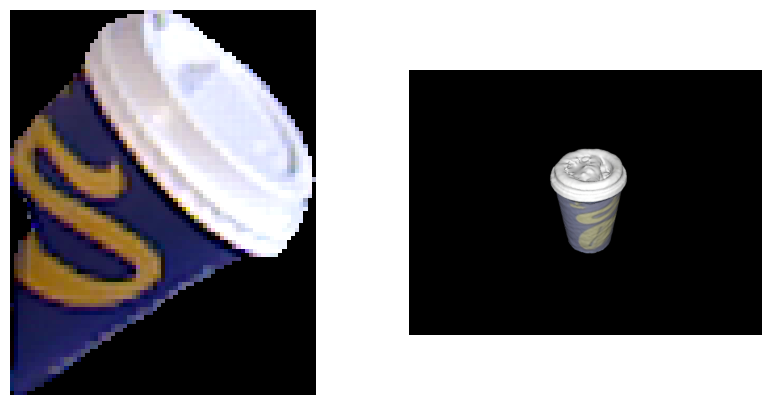

Dissimilarity score: tensor([0.4563])


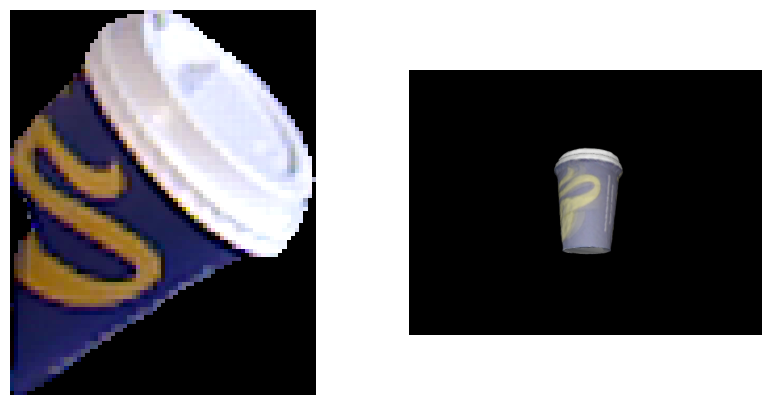

Dissimilarity score: tensor([0.1887])


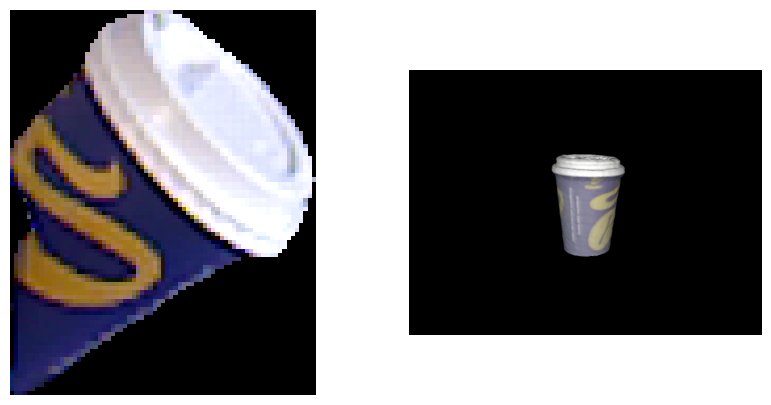

Dissimilarity score: tensor([0.5600])


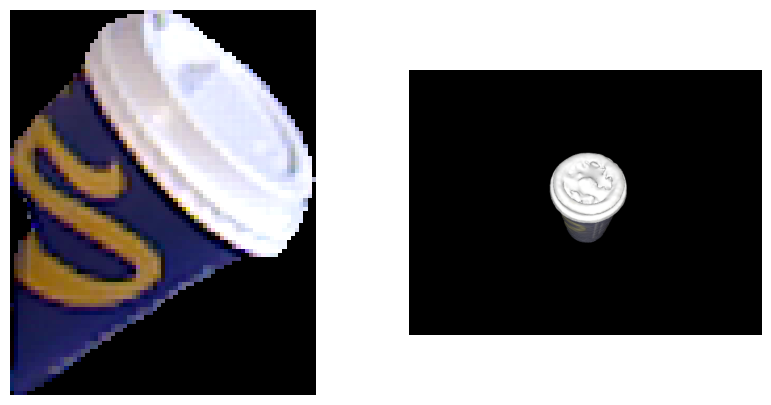

Dissimilarity score: tensor([0.2261])


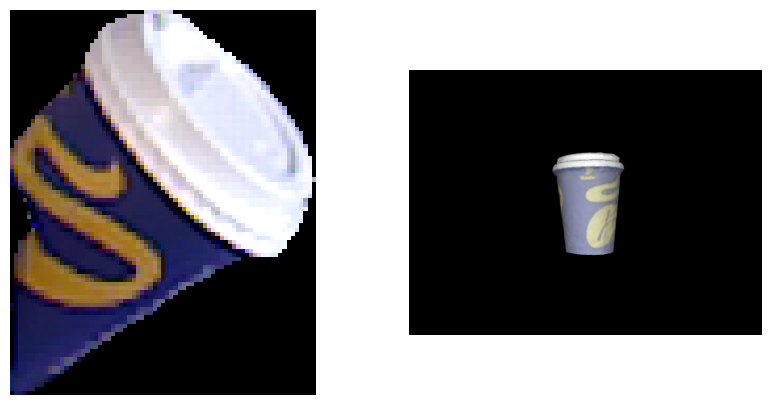

Dissimilarity score: tensor([0.4158])


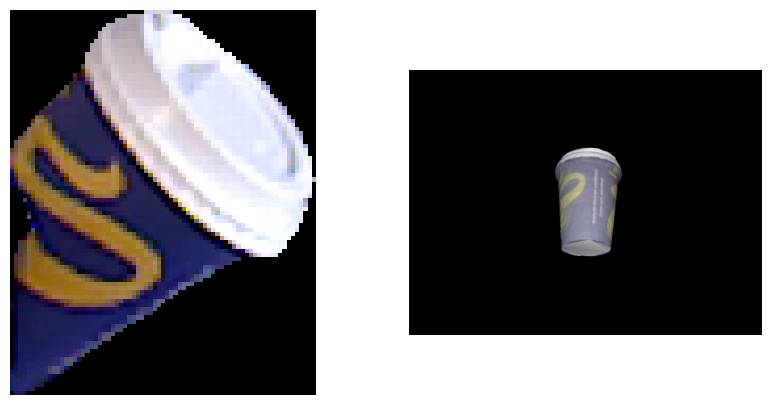

Dissimilarity score: tensor([0.1615])


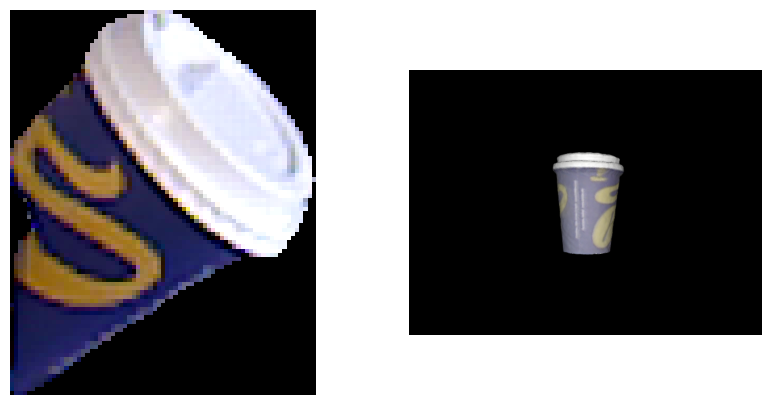

Dissimilarity score: tensor([0.1918])


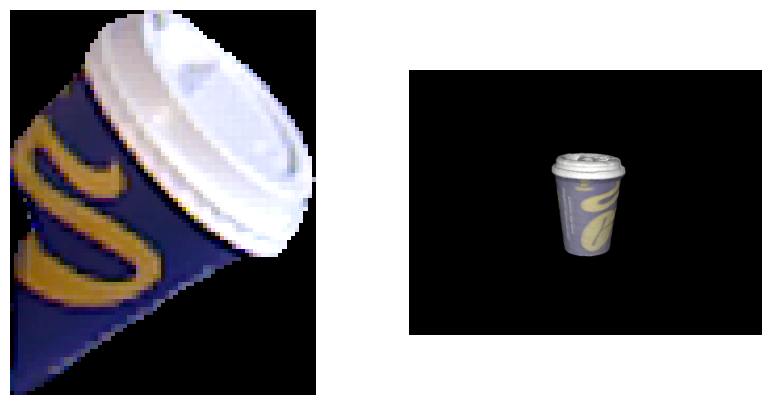

Dissimilarity score: tensor([0.6043])


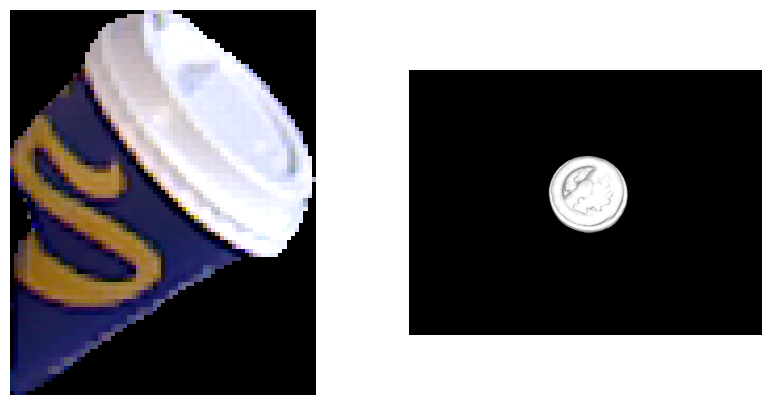

Dissimilarity score: tensor([0.5601])


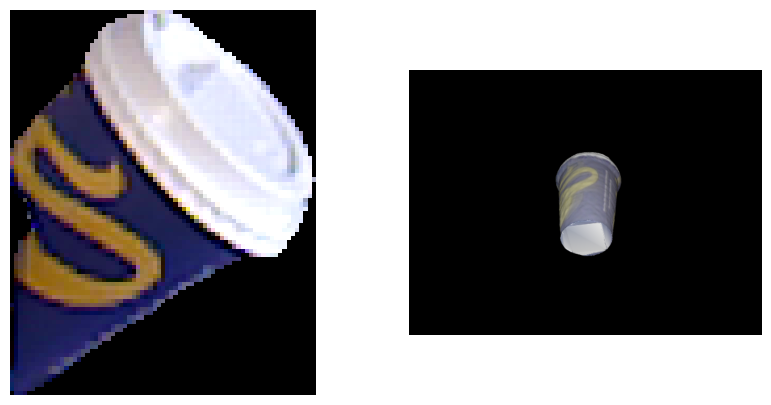

Dissimilarity score: tensor([0.6295])


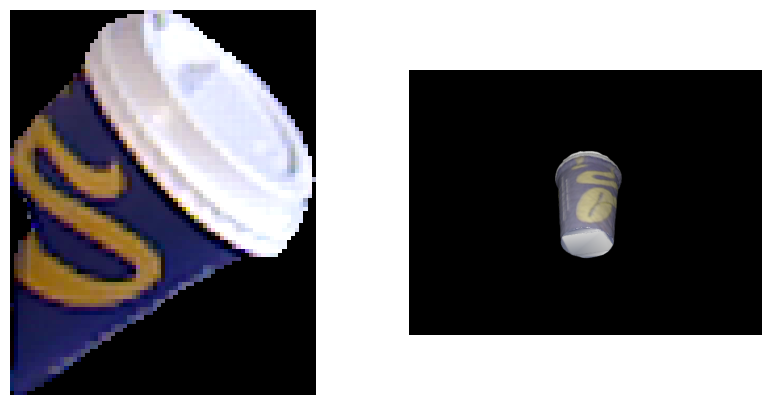

Dissimilarity score: tensor([0.7706])


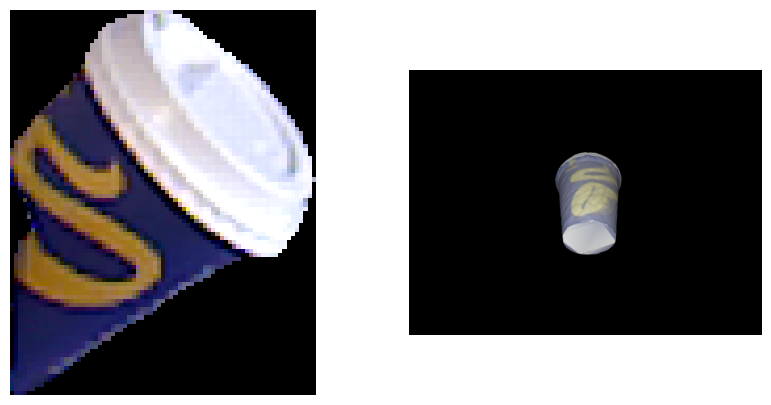

Dissimilarity score: tensor([0.3911])


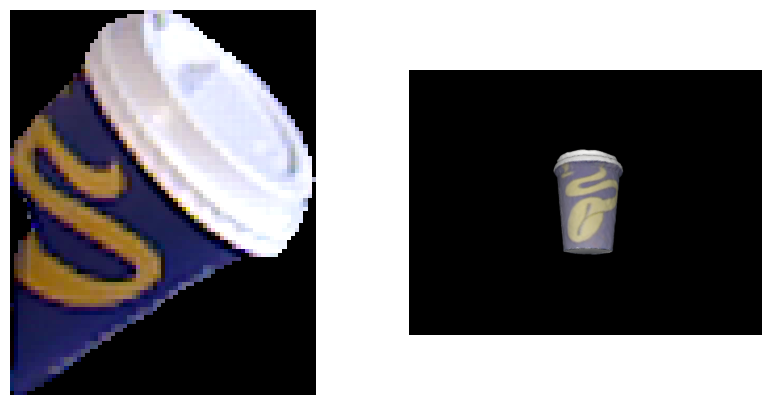

Dissimilarity score: tensor([0.1182])


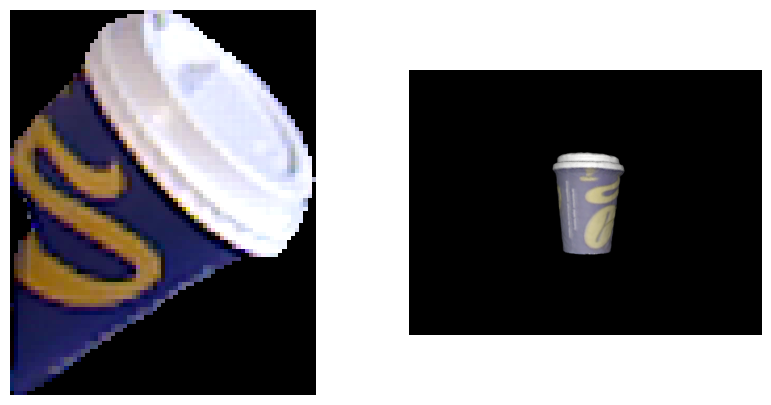

Dissimilarity score: tensor([0.5312])


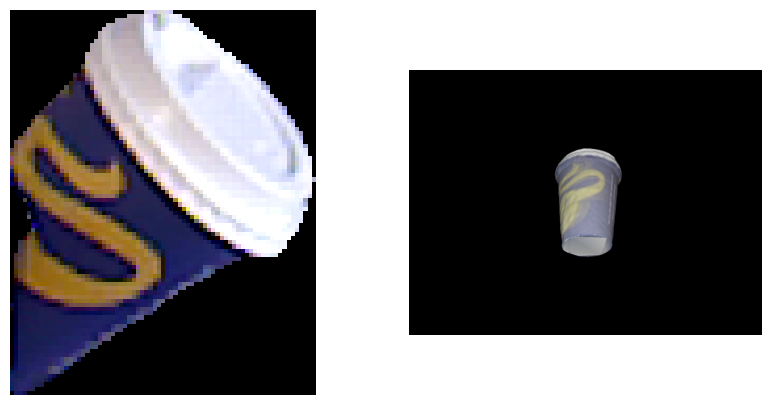

Dissimilarity score: tensor([0.2418])


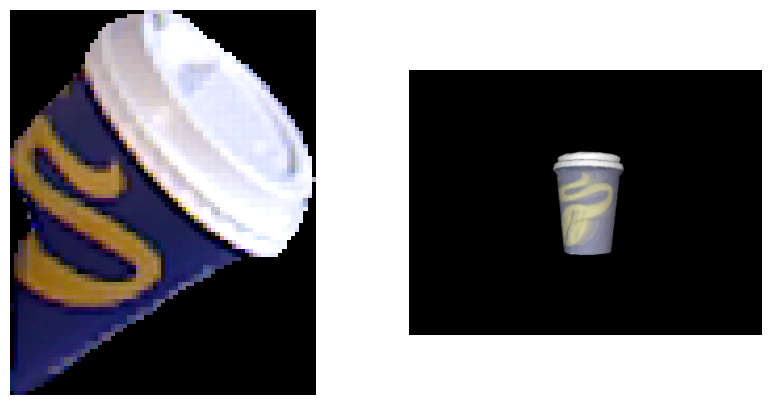

Dissimilarity score: tensor([0.1441])


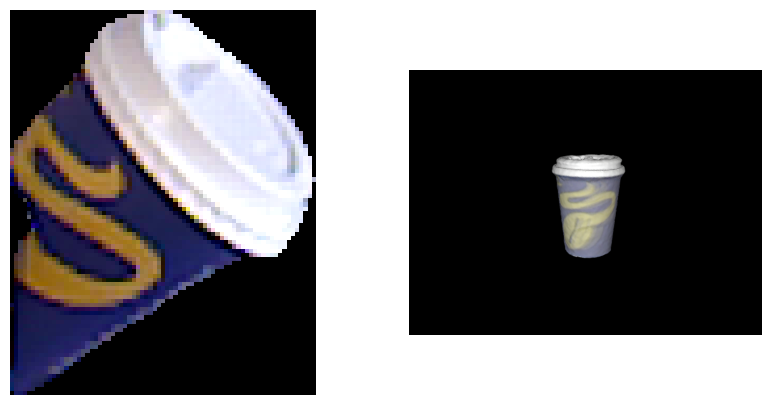

Dissimilarity score: tensor([0.1671])


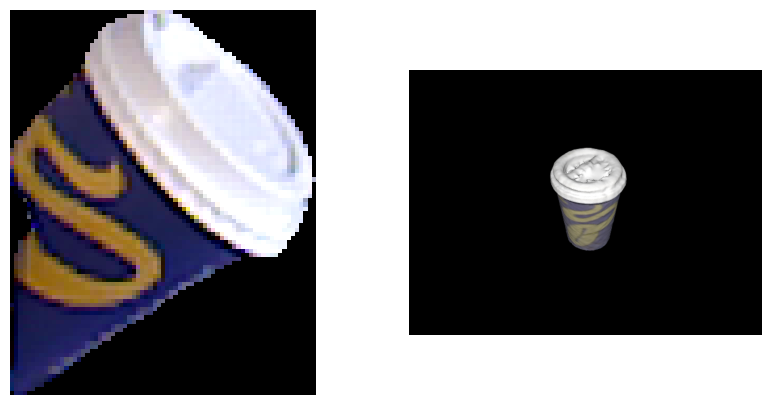

Dissimilarity score: tensor([0.3463])


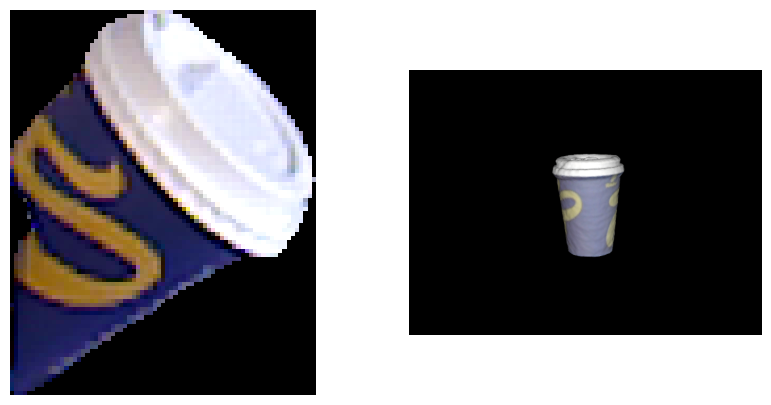

Dissimilarity score: tensor([0.4009])


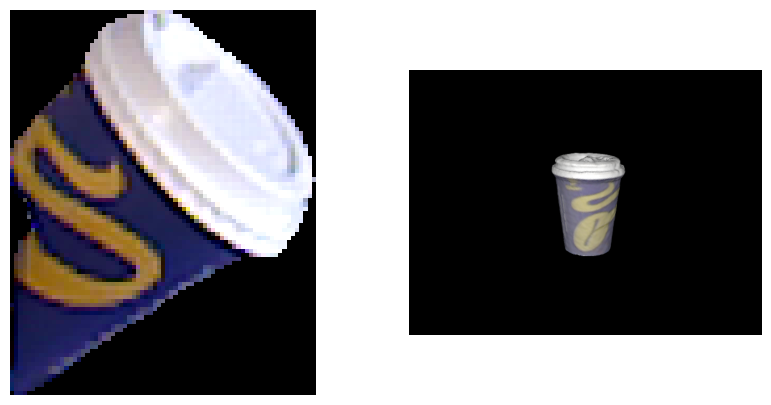

Dissimilarity score: tensor([0.4064])


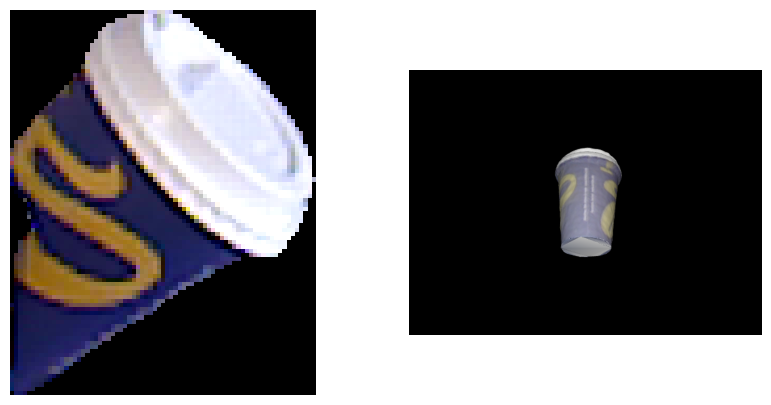

Dissimilarity score: tensor([0.4262])


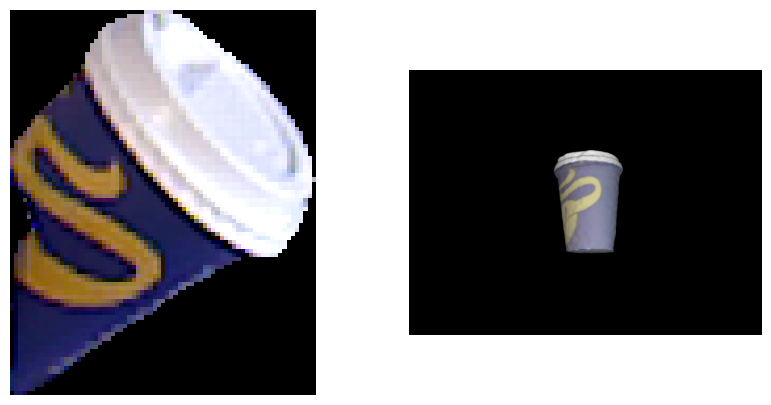

Dissimilarity score: tensor([0.7736])


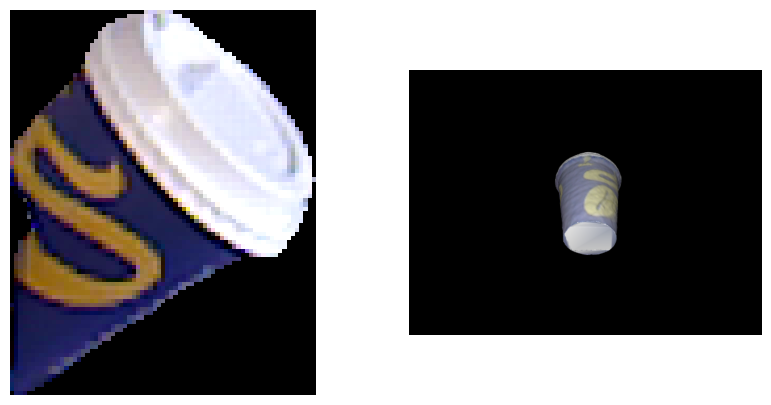

Dissimilarity score: tensor([0.7450])


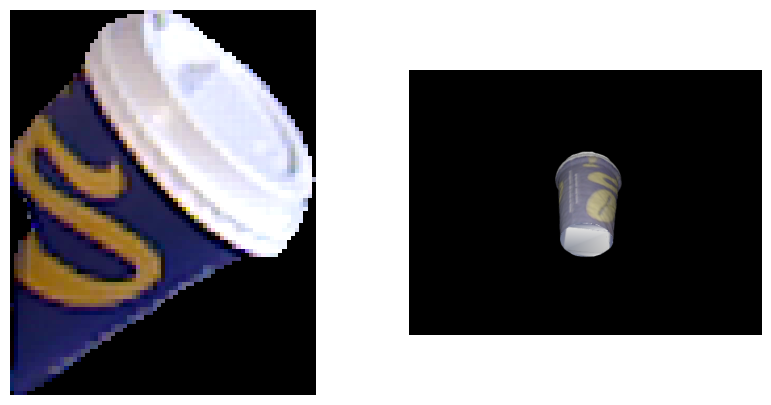

Dissimilarity score: tensor([0.1408])


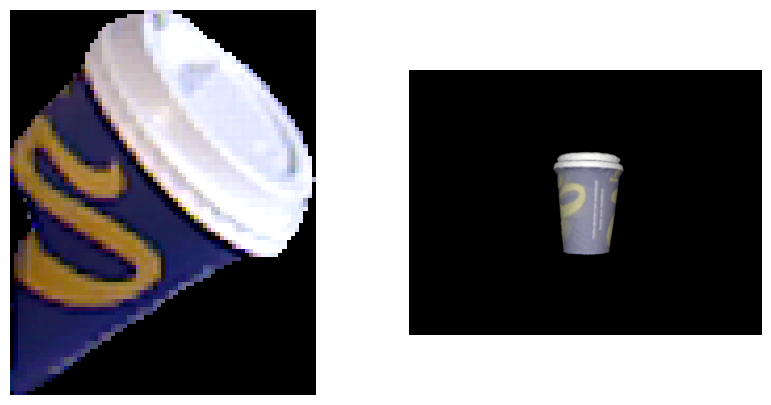

Dissimilarity score: tensor([0.6904])


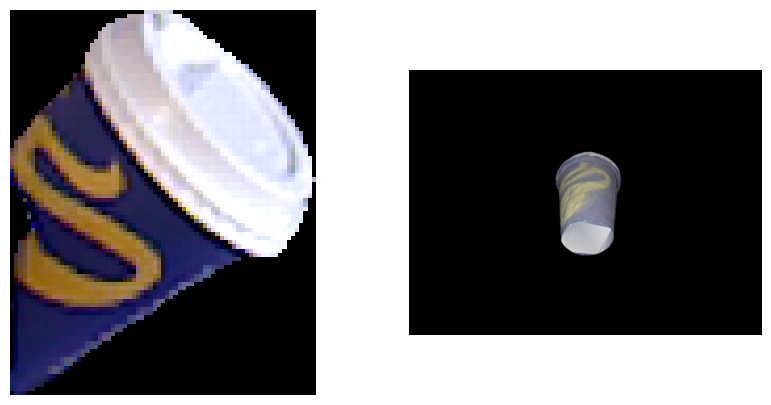

Dissimilarity score: tensor([0.3231])


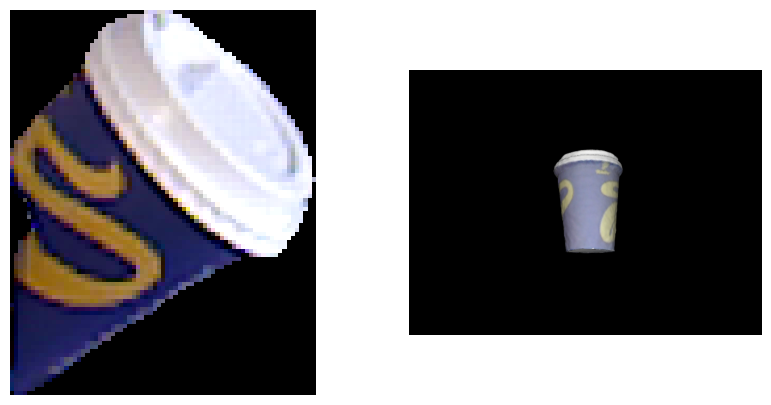

Dissimilarity score: tensor([0.0952])


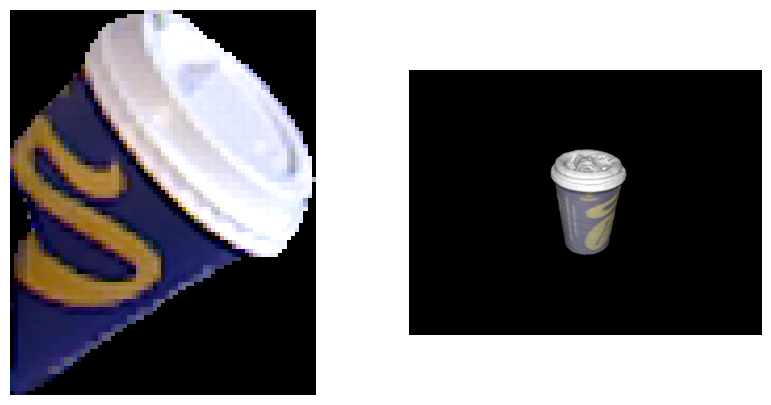

Dissimilarity score: tensor([0.0898])


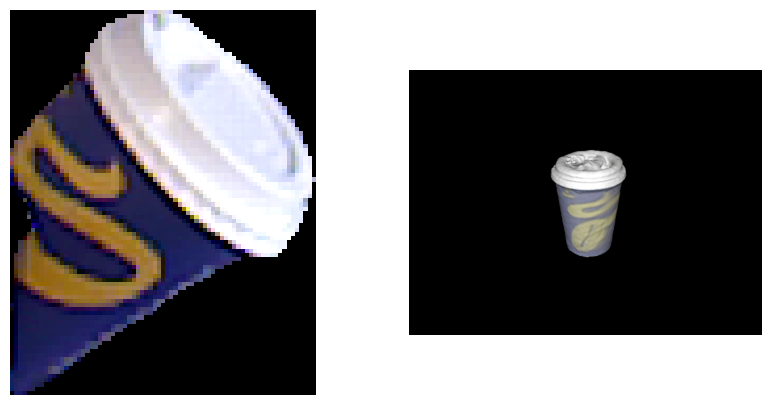

Dissimilarity score: tensor([0.5857])


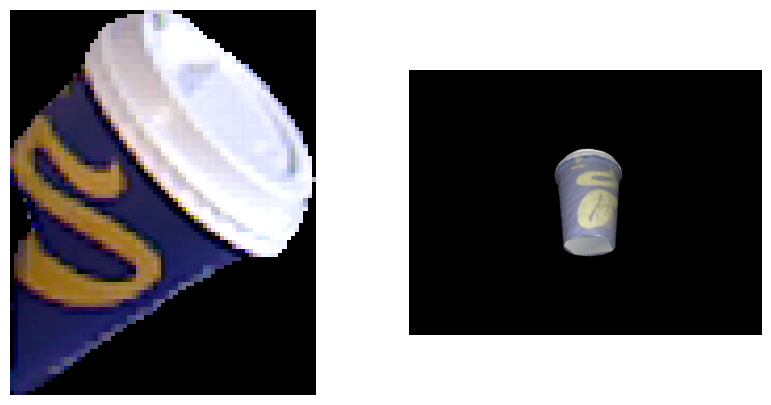

Dissimilarity score: tensor([0.5581])


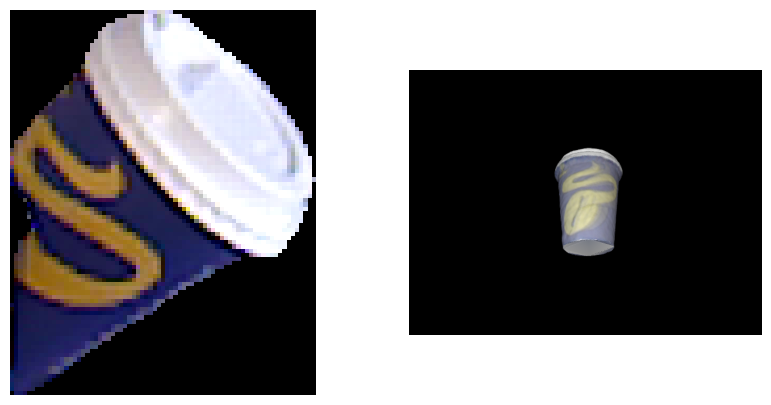

Dissimilarity score: tensor([0.1774])


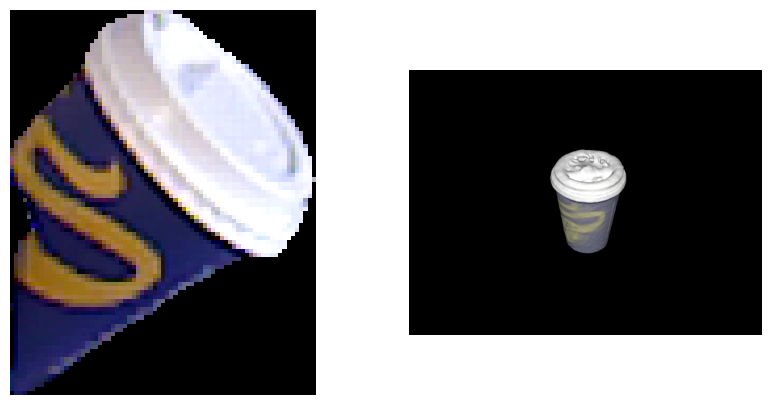

Dissimilarity score: tensor([0.0810])


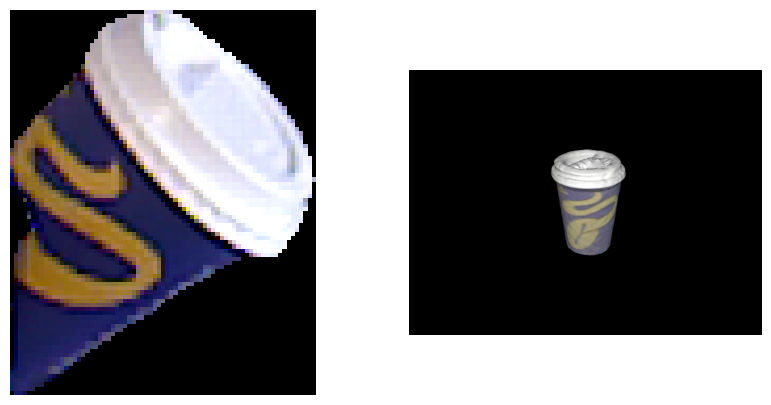

Dissimilarity score: tensor([0.7753])


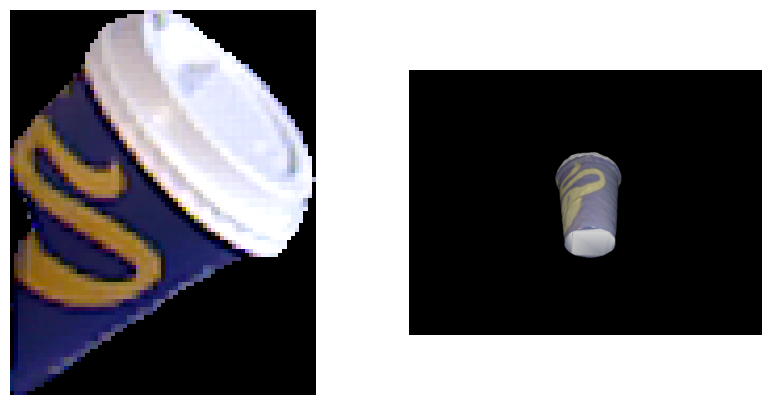

Dissimilarity score: tensor([0.1373])


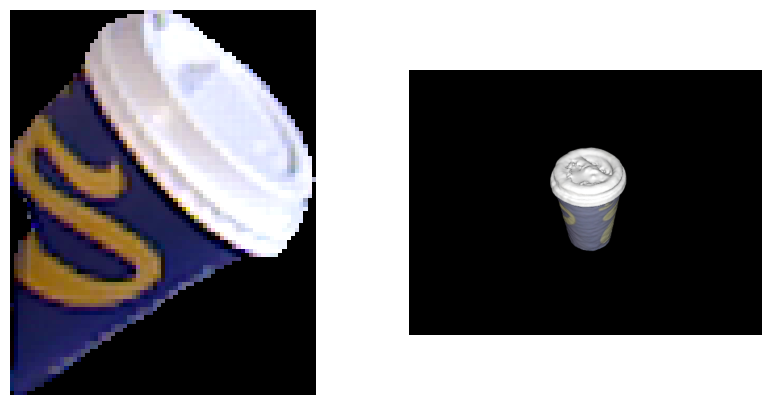

Dissimilarity score: tensor([0.5255])


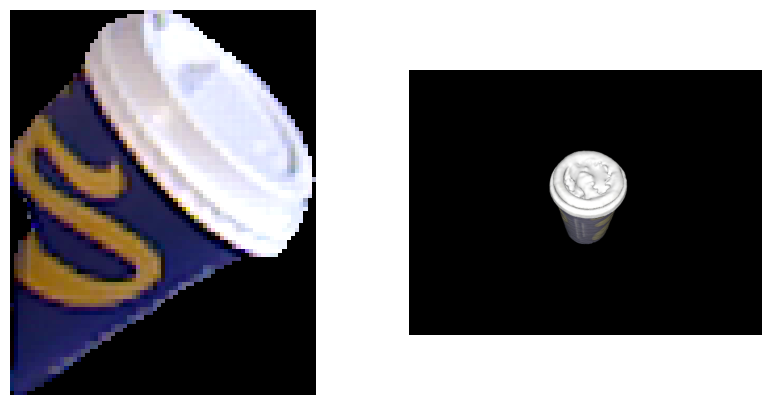

Dissimilarity score: tensor([0.4677])


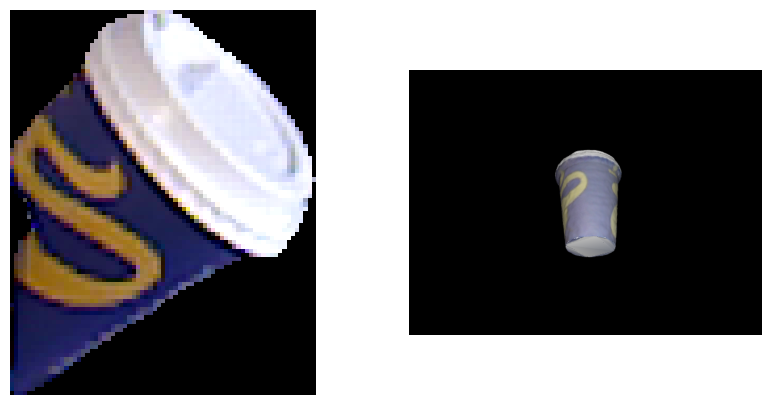

Dissimilarity score: tensor([0.5443])


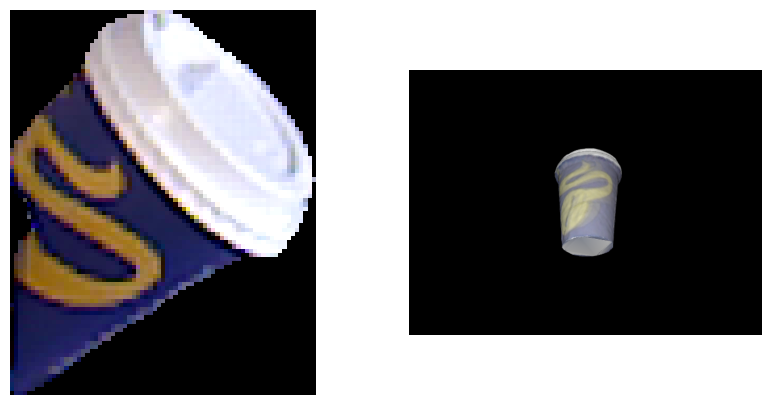

Dissimilarity score: tensor([0.1023])


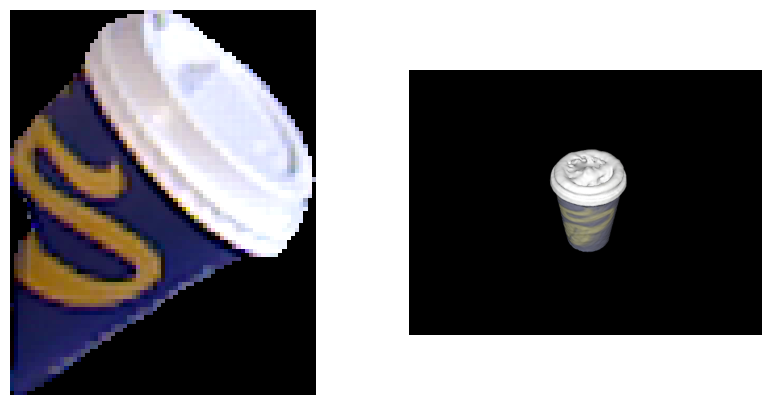

Dissimilarity score: tensor([0.2532])


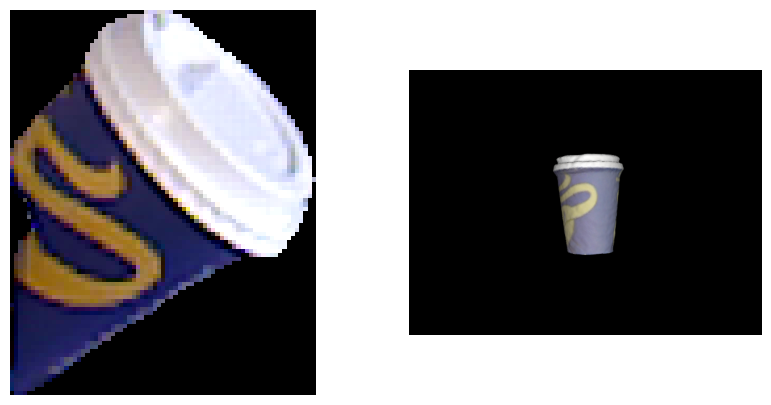

Dissimilarity score: tensor([0.7232])


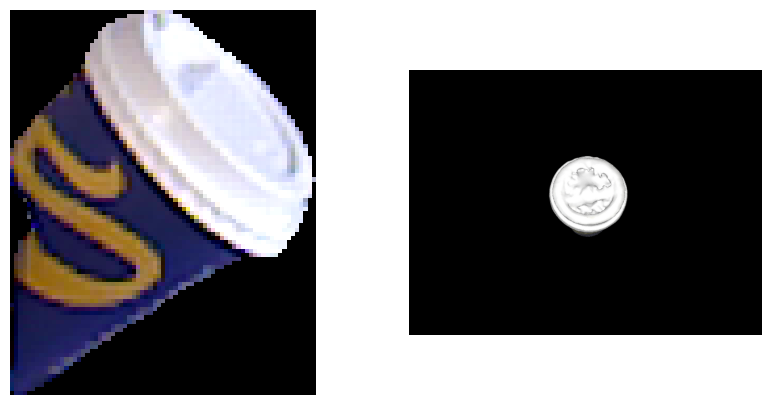

Dissimilarity score: tensor([0.7378])


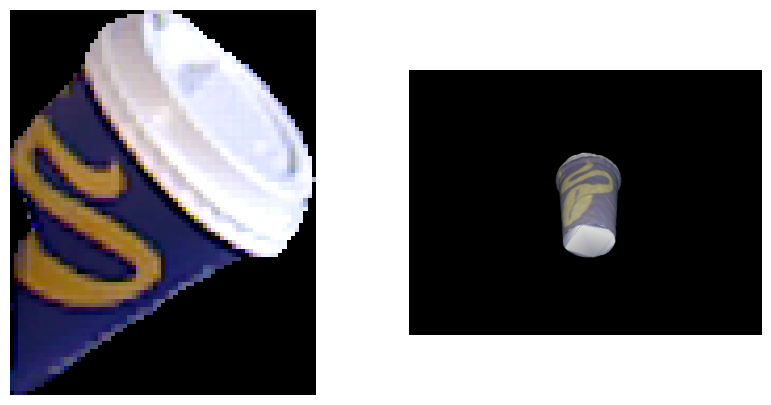

Dissimilarity score: tensor([0.2275])


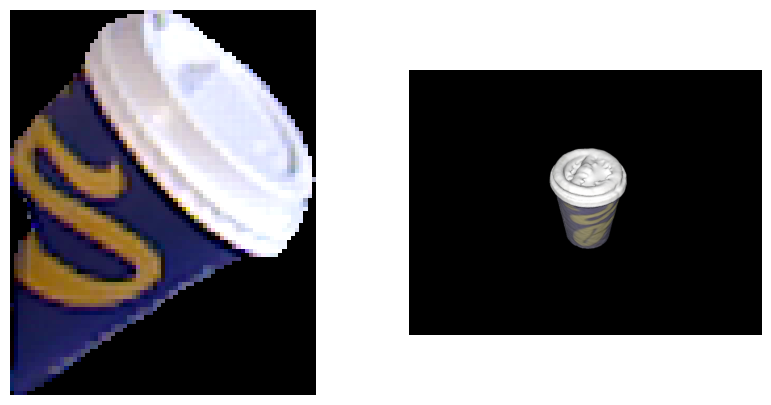

Dissimilarity score: tensor([0.5504])


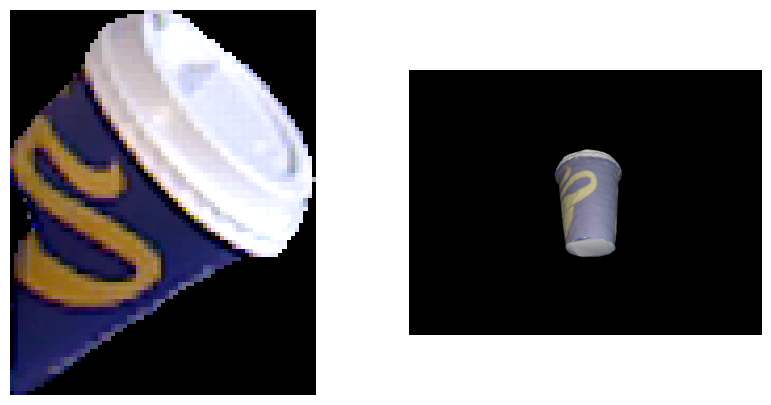

Dissimilarity score: tensor([0.2355])


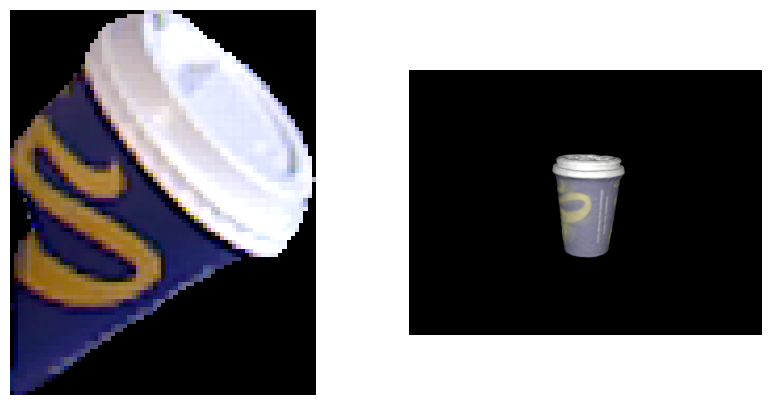

Dissimilarity score: tensor([0.6745])


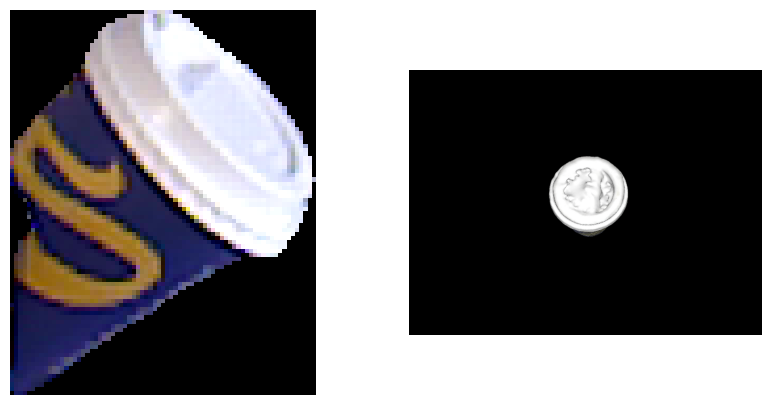

Dissimilarity score: tensor([0.6893])


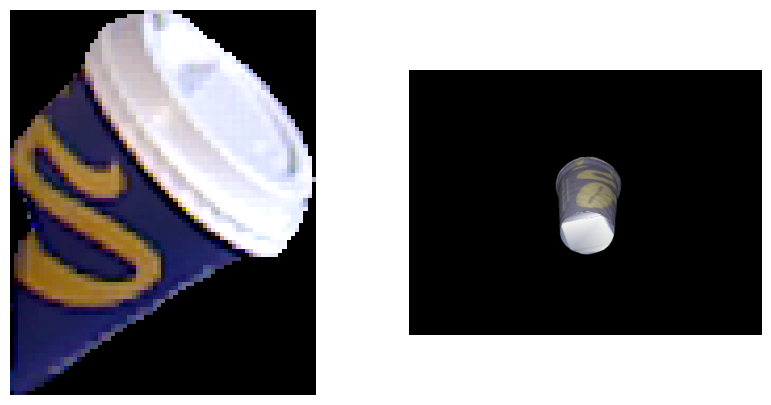

Dissimilarity score: tensor([0.1860])


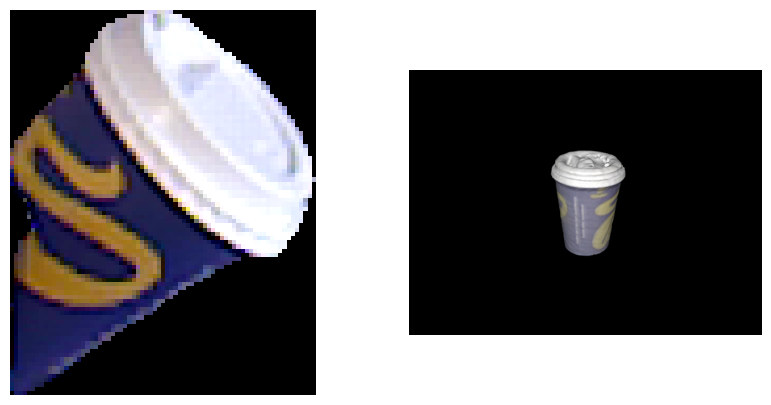

Dissimilarity score: tensor([0.4515])


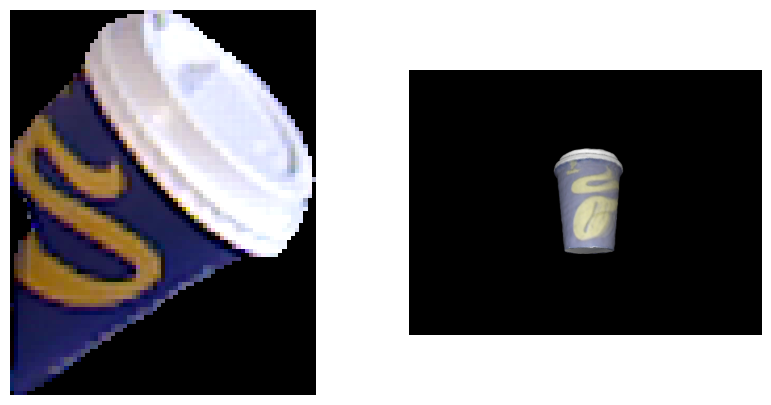

Dissimilarity score: tensor([0.5767])


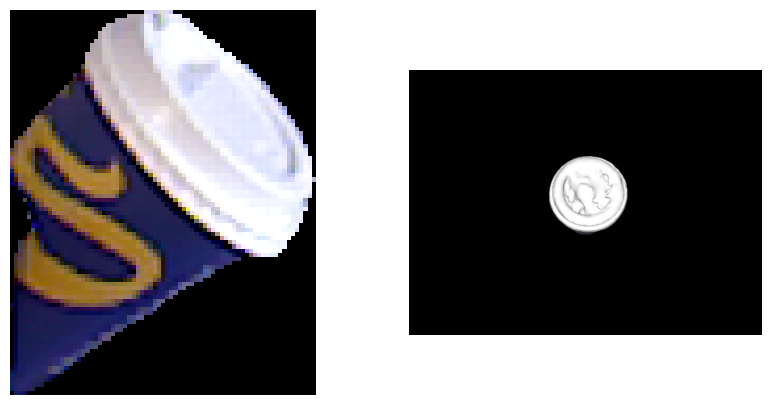

Dissimilarity score: tensor([0.4262])


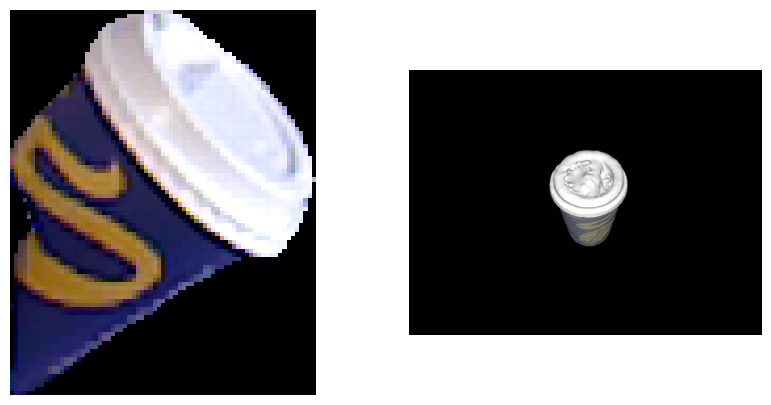

Dissimilarity score: tensor([0.2733])


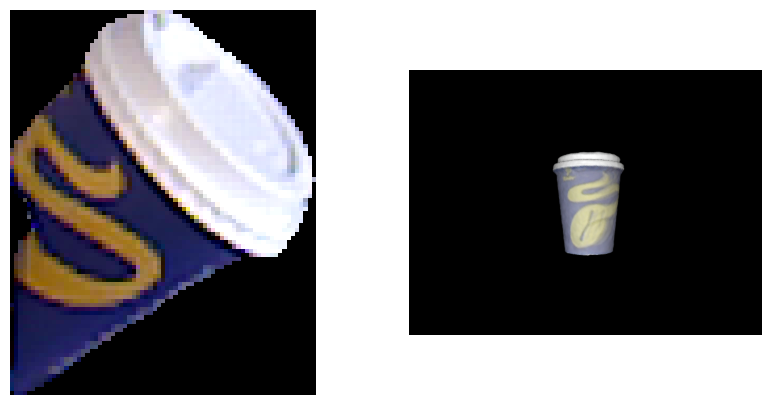

Dissimilarity score: tensor([0.7520])


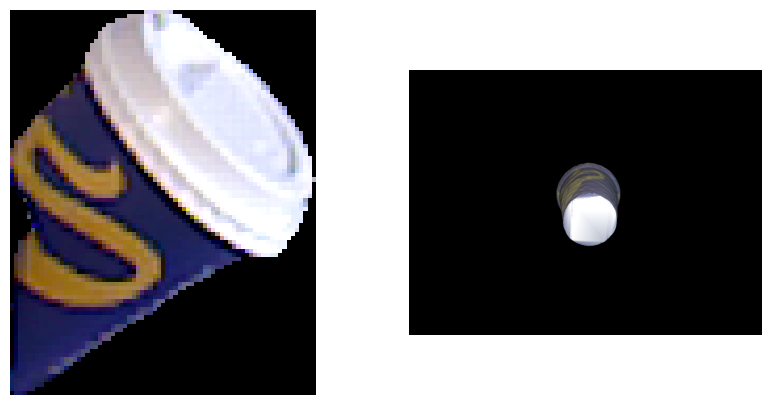

Dissimilarity score: tensor([0.1966])


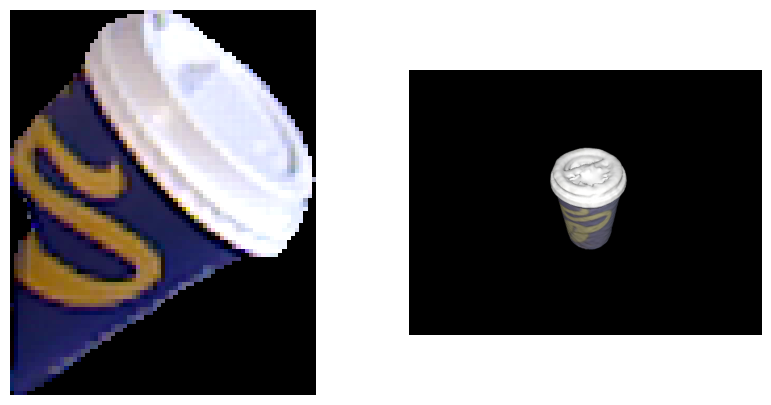

Dissimilarity score: tensor([0.2791])


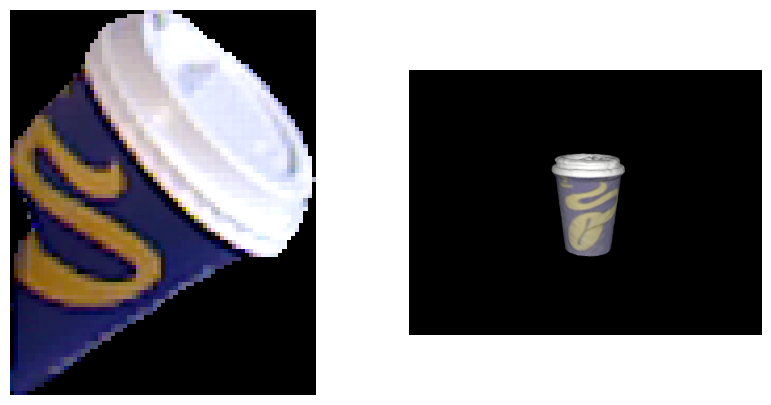

Dissimilarity score: tensor([0.4937])


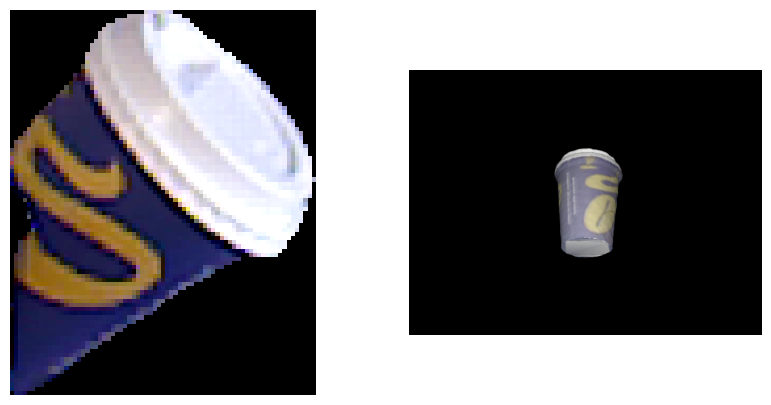

Dissimilarity score: tensor([0.5513])


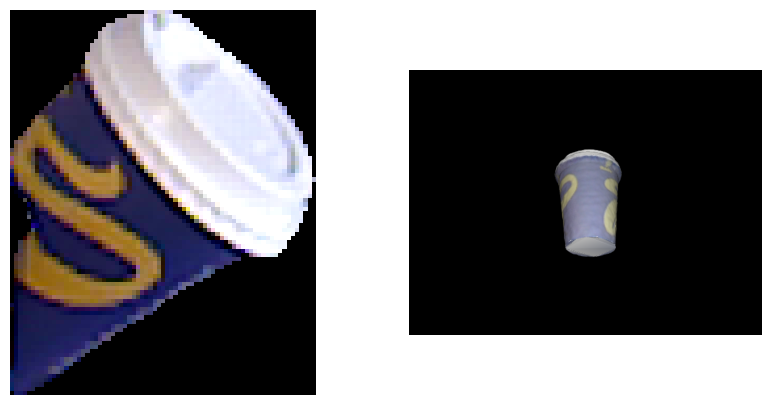

Dissimilarity score: tensor([0.1569])


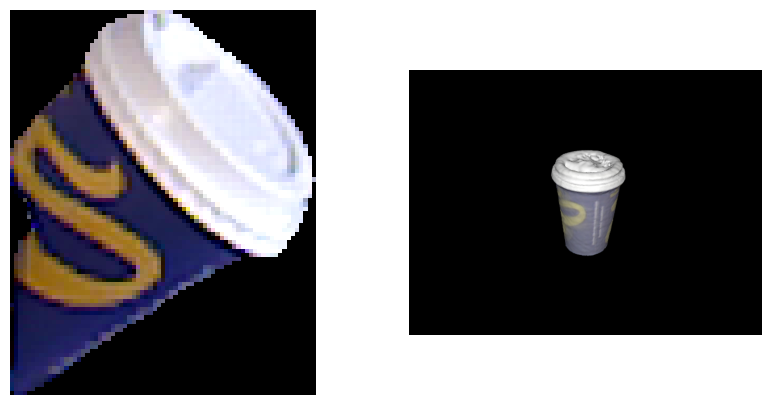

Dissimilarity score: tensor([0.0667])


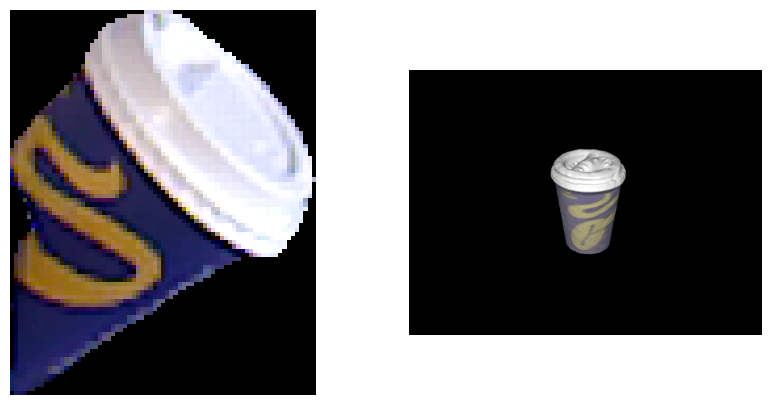

Dissimilarity score: tensor([0.1608])


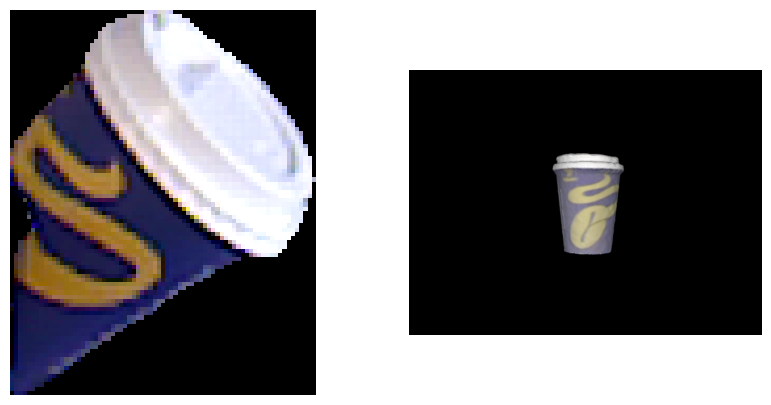

Dissimilarity score: tensor([0.5033])


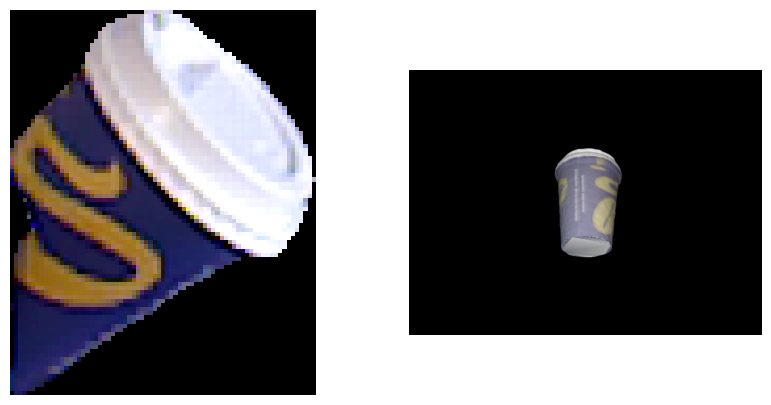

Dissimilarity score: tensor([0.4913])


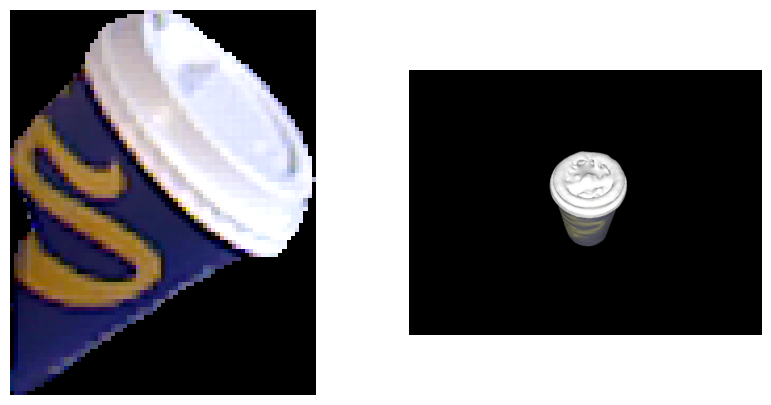

Dissimilarity score: tensor([0.4118])


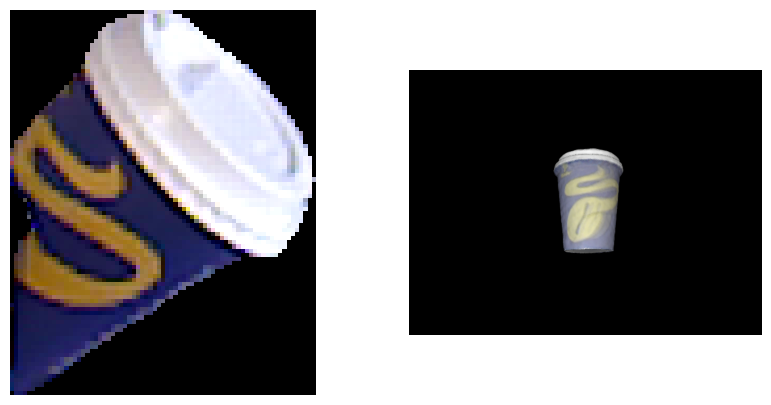

Dissimilarity score: tensor([0.4128])


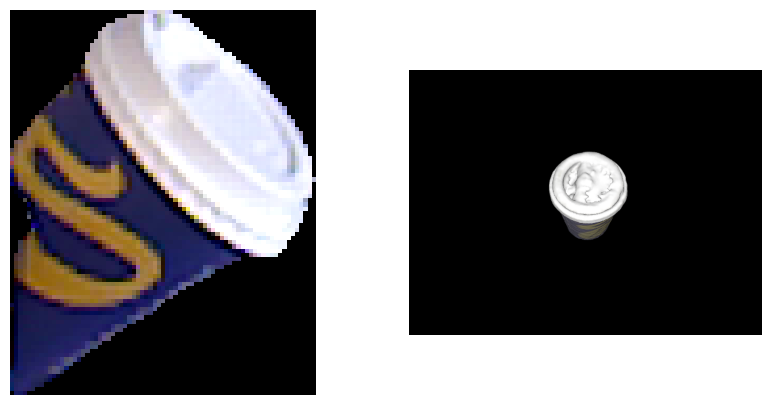

Dissimilarity score: tensor([0.2272])


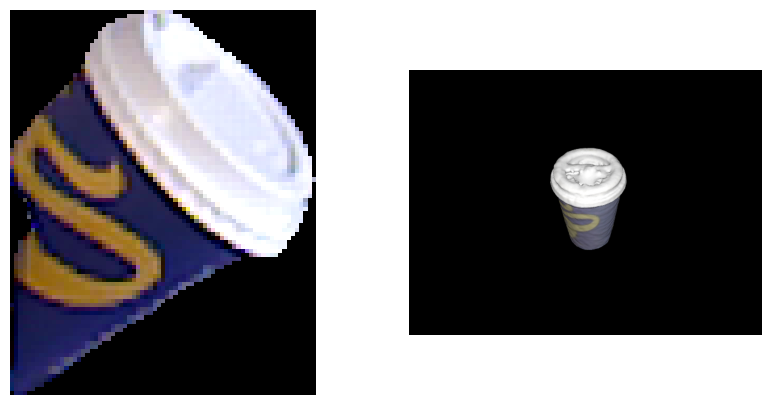

Dissimilarity score: tensor([0.3659])


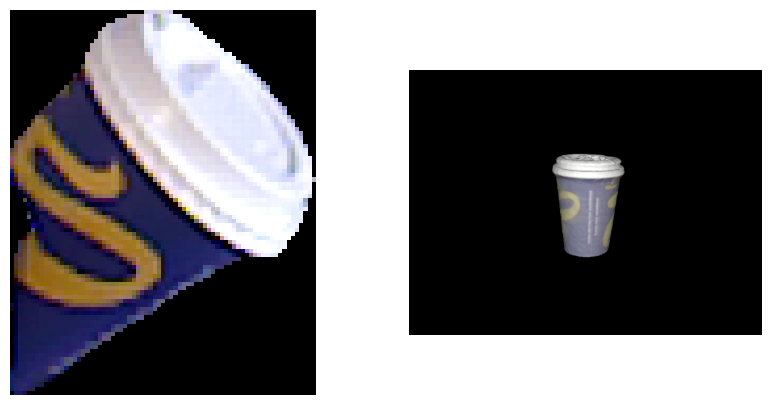

Dissimilarity score: tensor([0.6384])


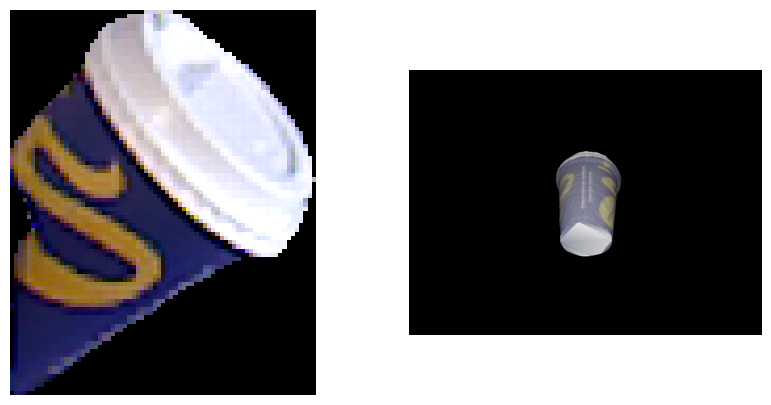

Dissimilarity score: tensor([0.2610])


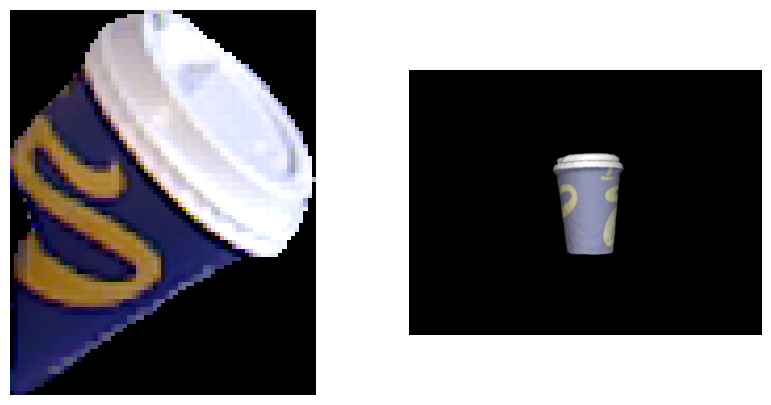

Dissimilarity score: tensor([0.2443])


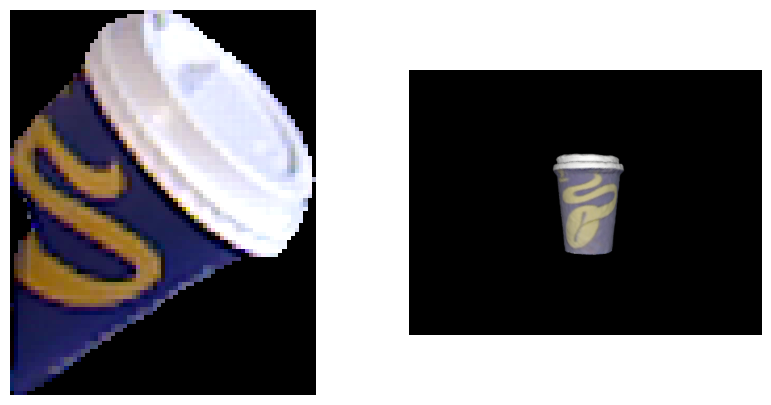

Dissimilarity score: tensor([0.1330])


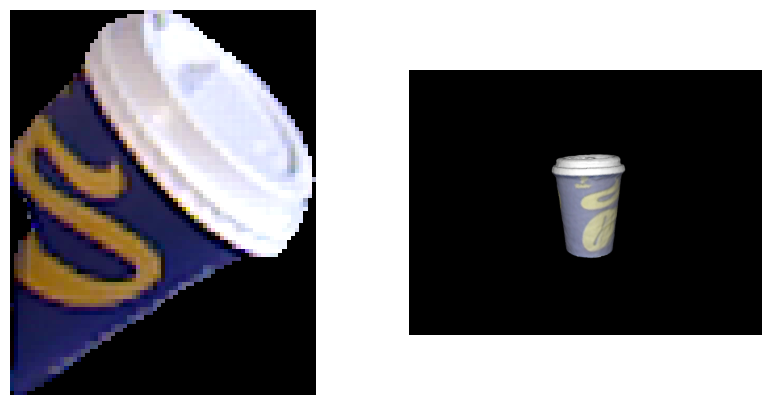

Dissimilarity score: tensor([0.3100])


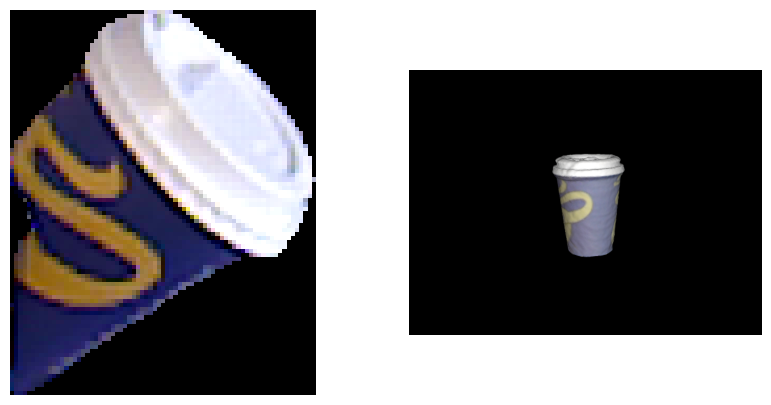

Dissimilarity score: tensor([0.5574])


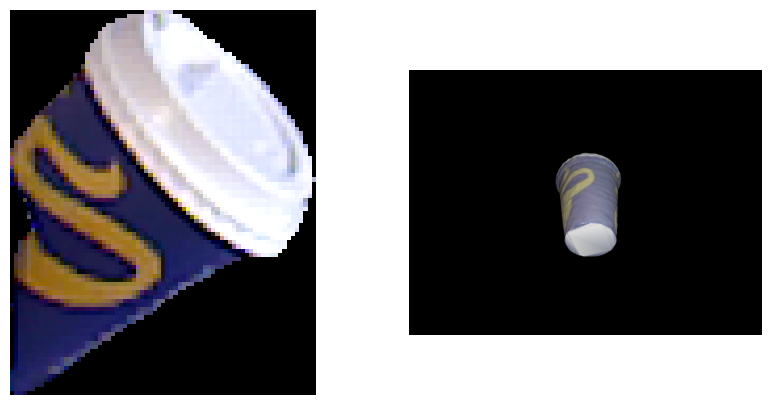

Dissimilarity score: tensor([0.0913])


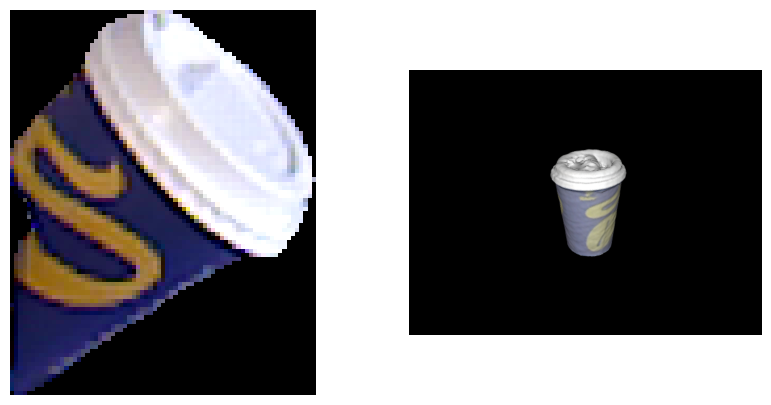

Dissimilarity score: tensor([0.2771])


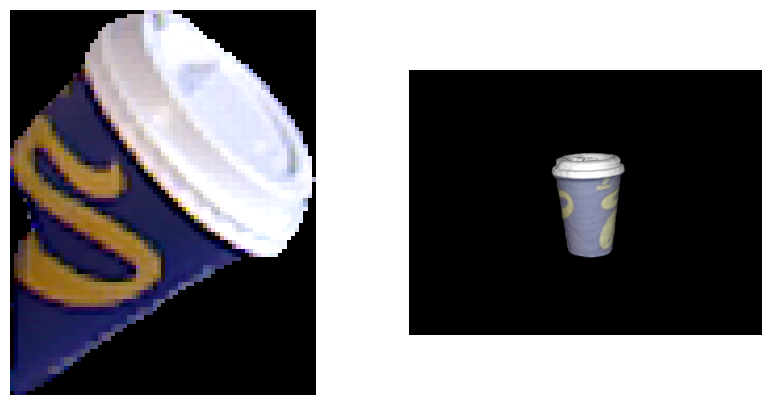

Dissimilarity score: tensor([0.3038])


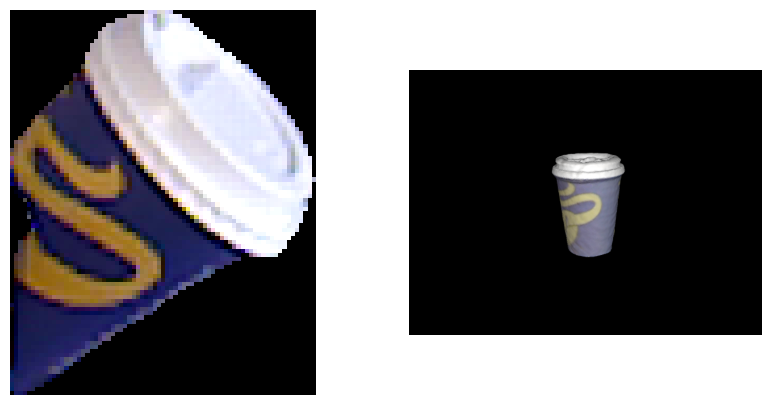

Dissimilarity score: tensor([0.1235])


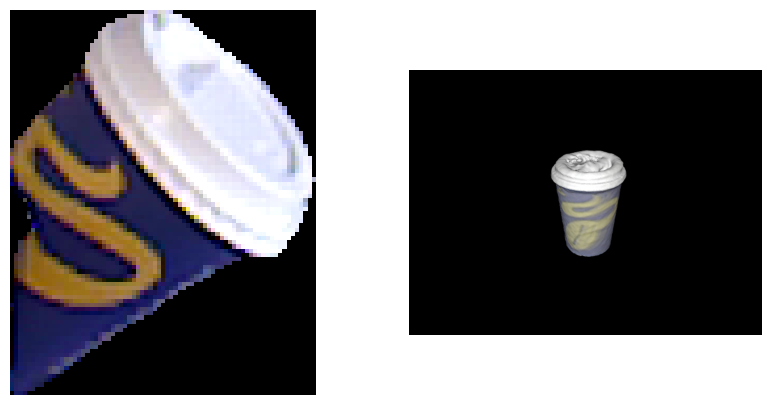

Dissimilarity score: tensor([0.3862])


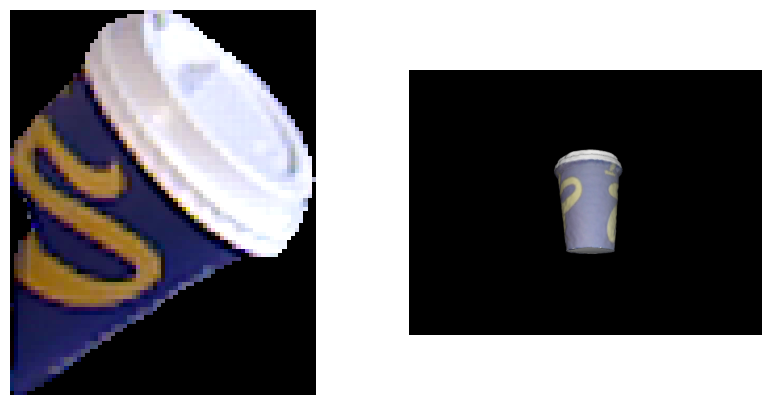

Dissimilarity score: tensor([0.1356])


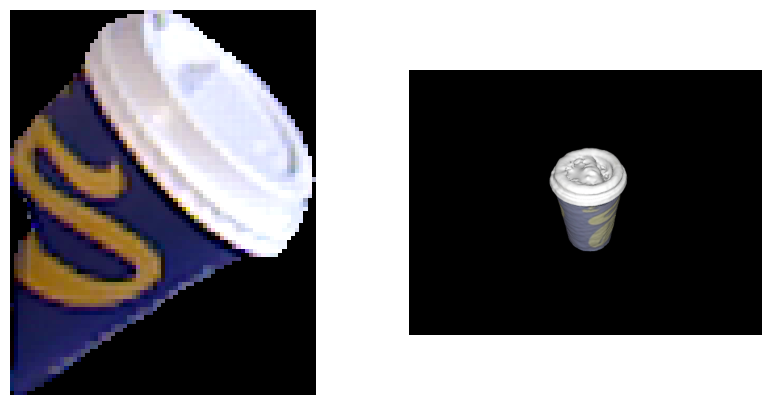

Dissimilarity score: tensor([0.1453])


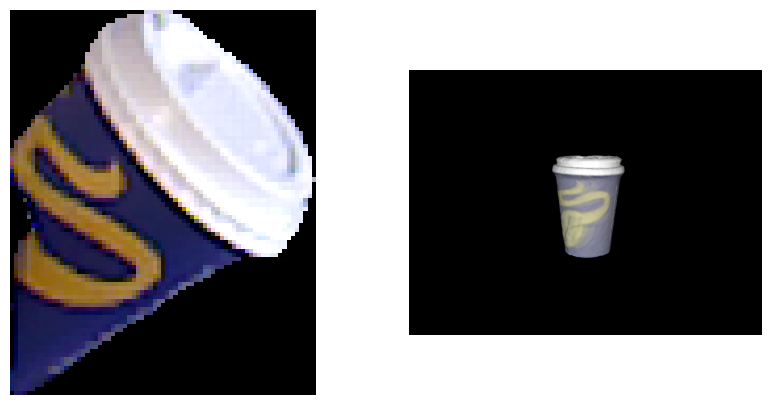

Dissimilarity score: tensor([0.2188])


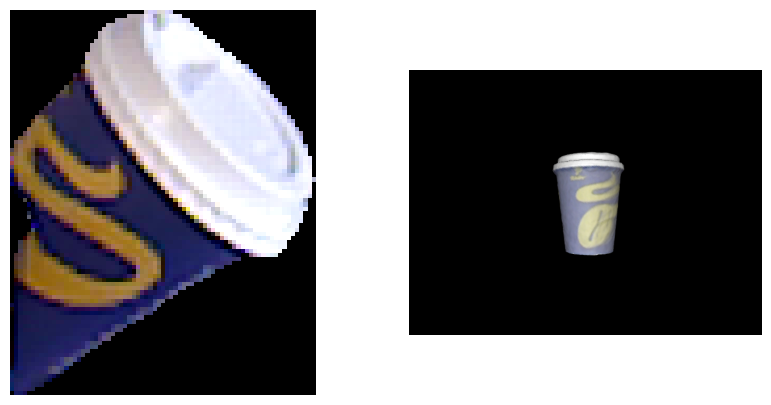

Dissimilarity score: tensor([0.5349])


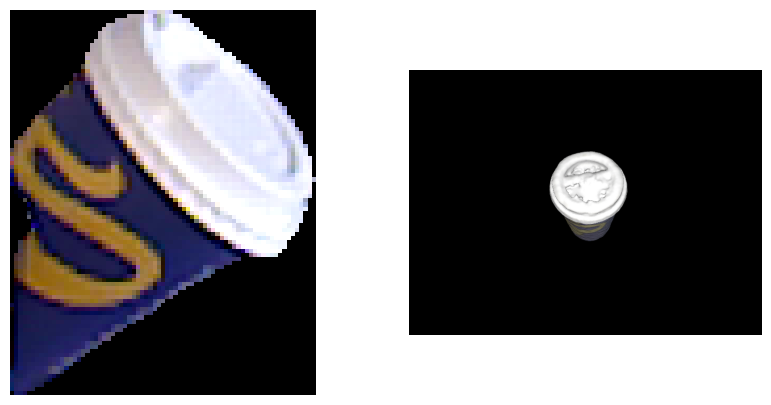

Dissimilarity score: tensor([0.2719])


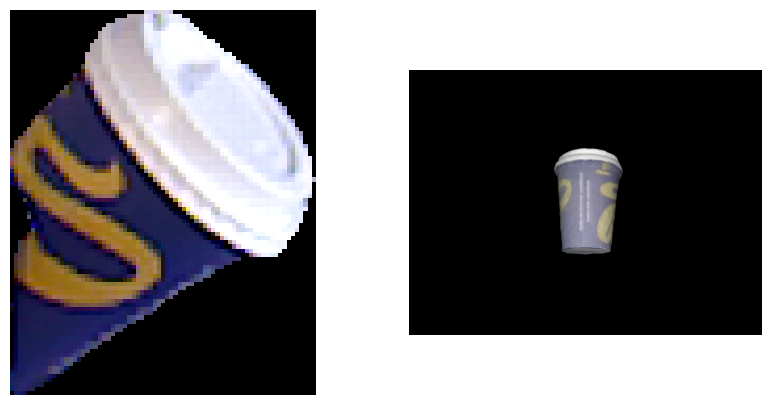

Dissimilarity score: tensor([0.4197])


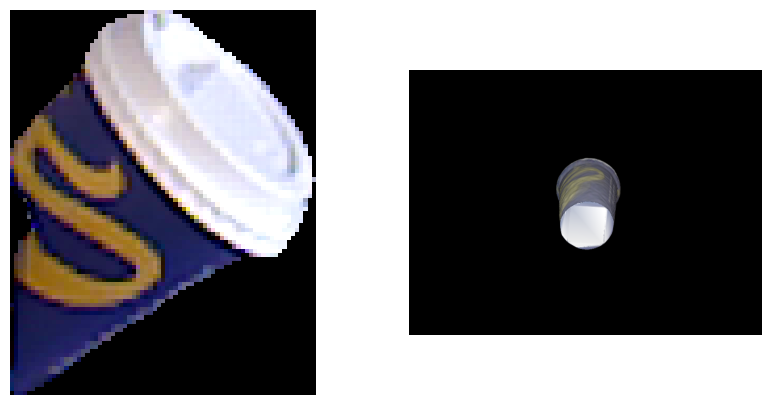

Dissimilarity score: tensor([0.6331])


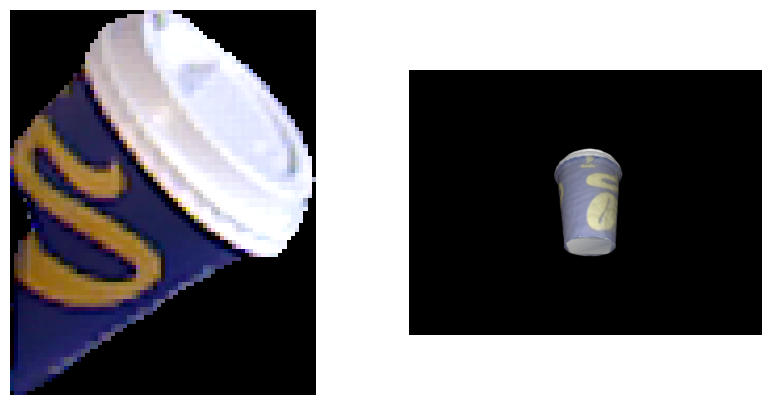

Dissimilarity score: tensor([0.4191])


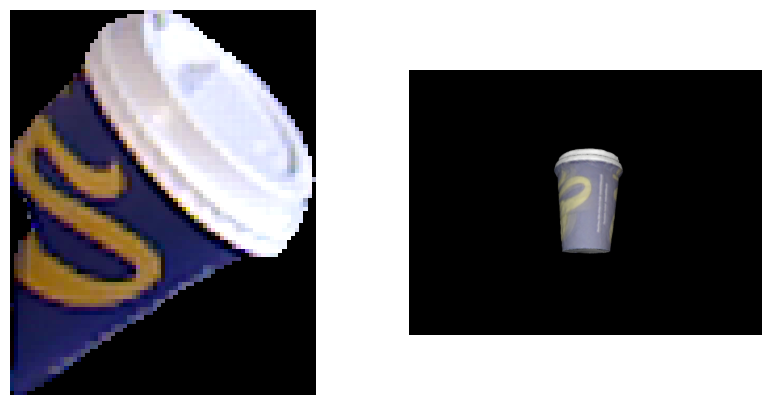

Dissimilarity score: tensor([0.2073])


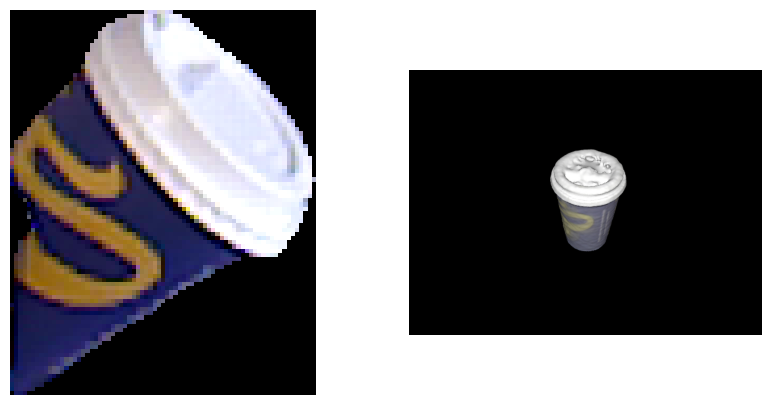

Dissimilarity score: tensor([0.1111])


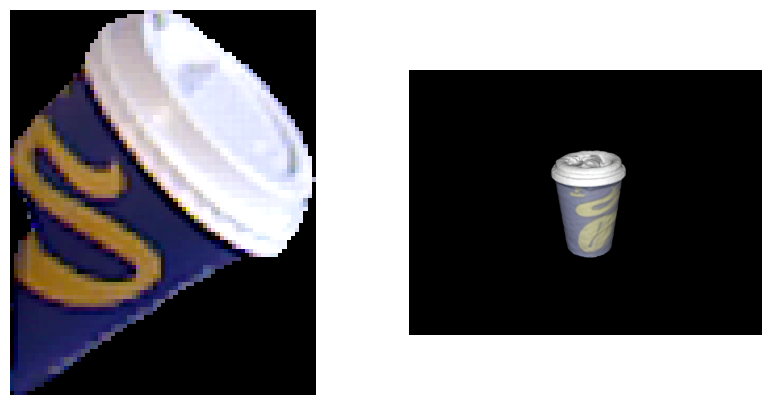

Dissimilarity score: tensor([0.1917])


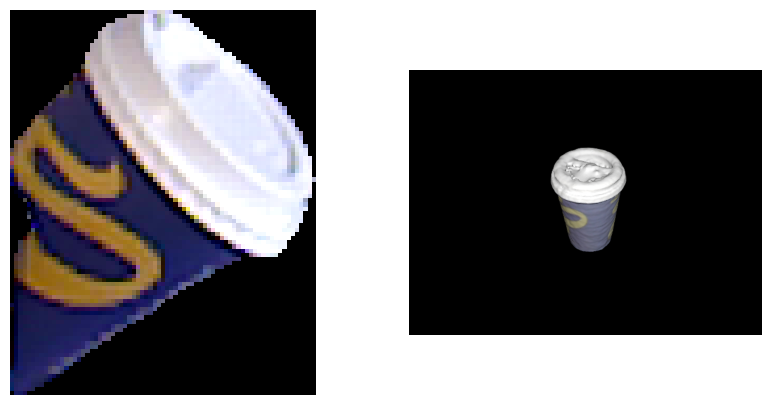

Dissimilarity score: tensor([0.1769])


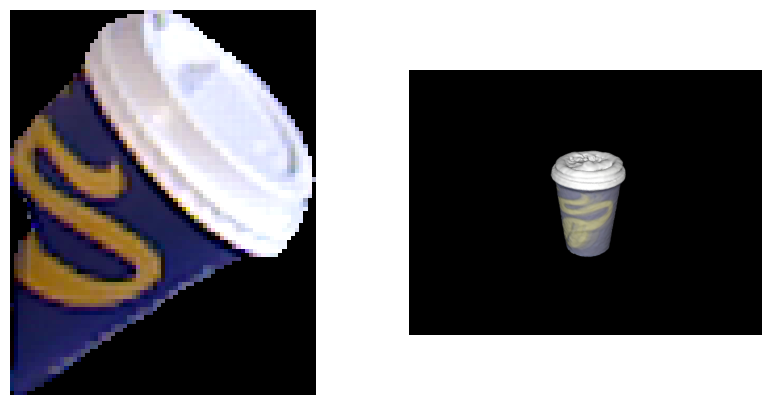

Dissimilarity score: tensor([0.2796])


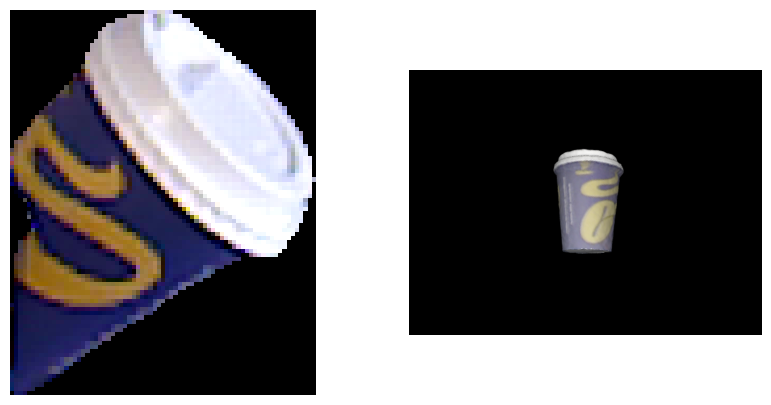

Dissimilarity score: tensor([0.4620])


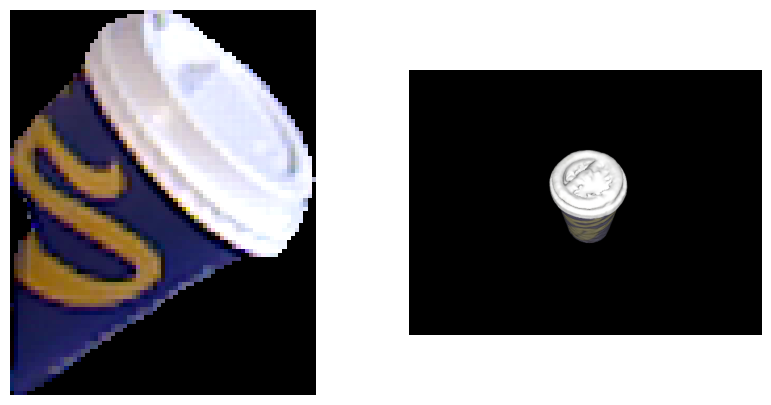

Dissimilarity score: tensor([0.3677])


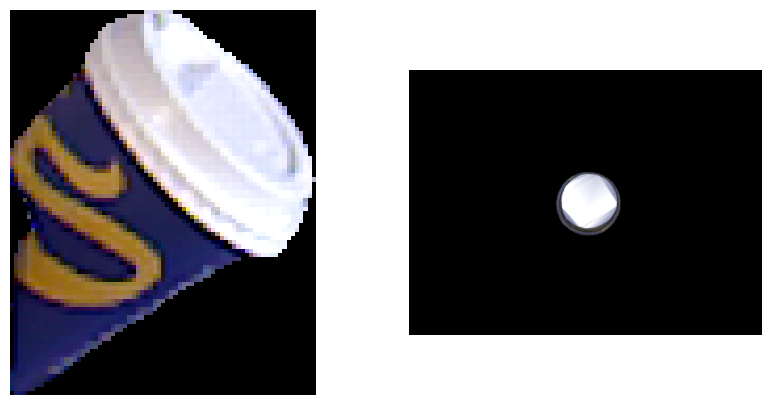

Dissimilarity score: tensor([0.4629])


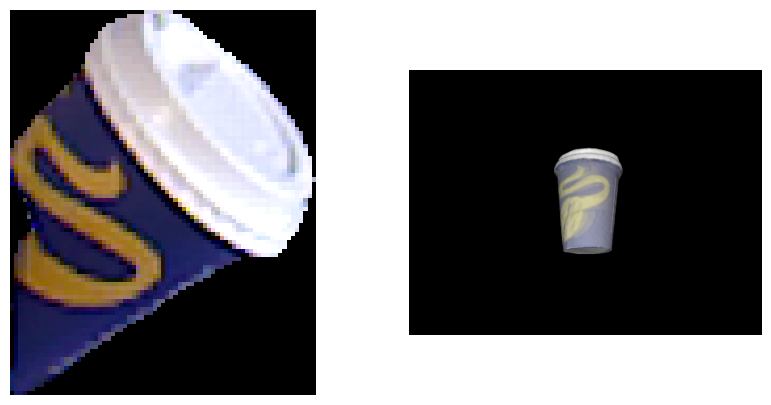

Dissimilarity score: tensor([0.4956])


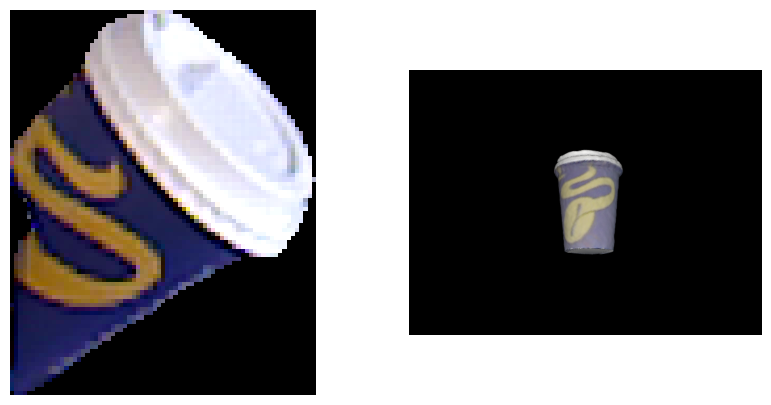

Dissimilarity score: tensor([0.6918])


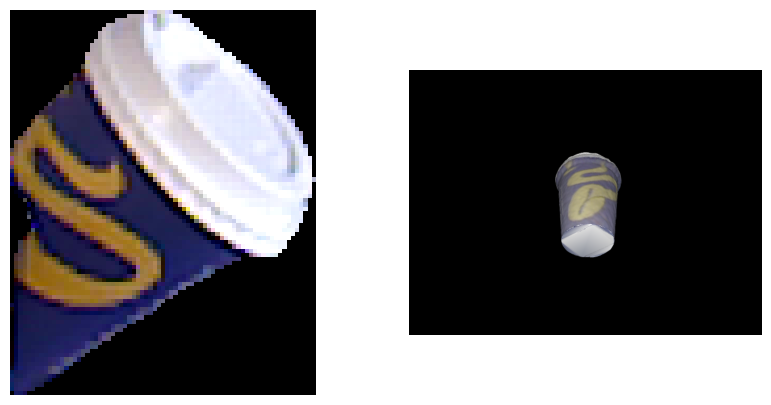

Dissimilarity score: tensor([0.5383])


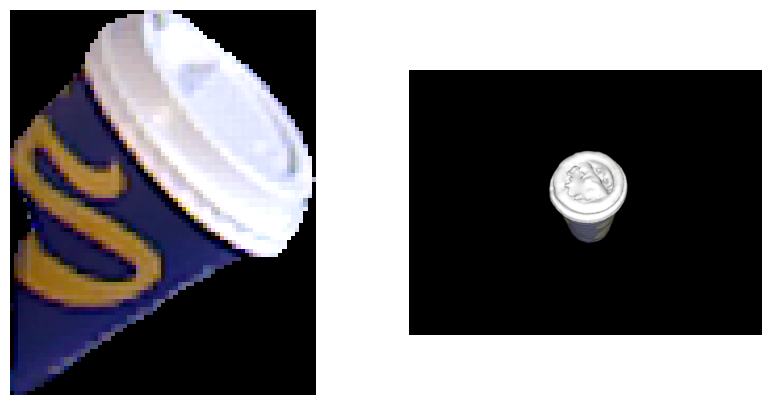

Dissimilarity score: tensor([0.2322])


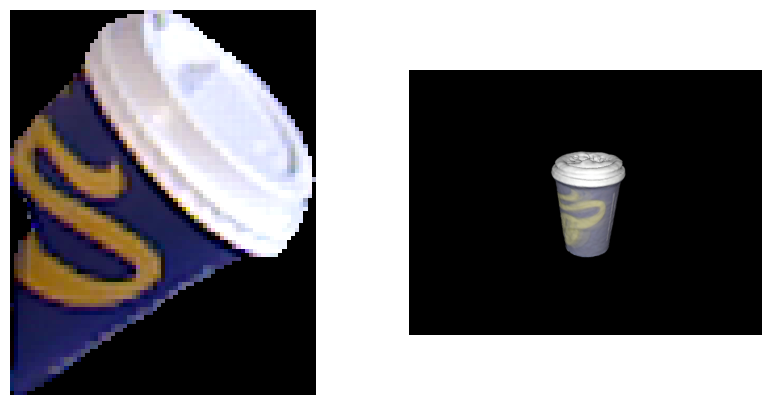

Dissimilarity score: tensor([0.1045])


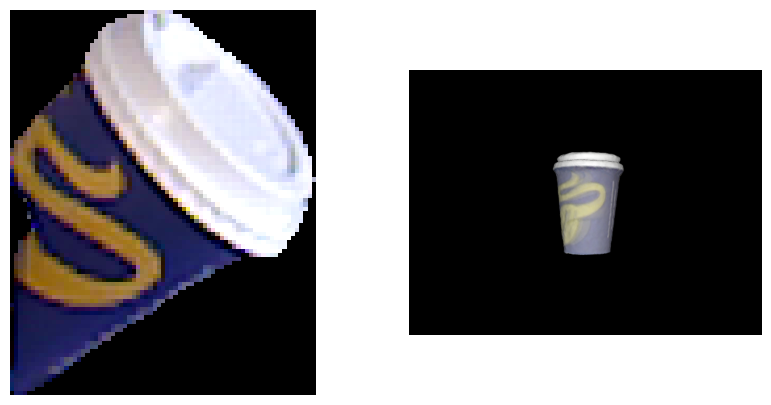

Dissimilarity score: tensor([0.5063])


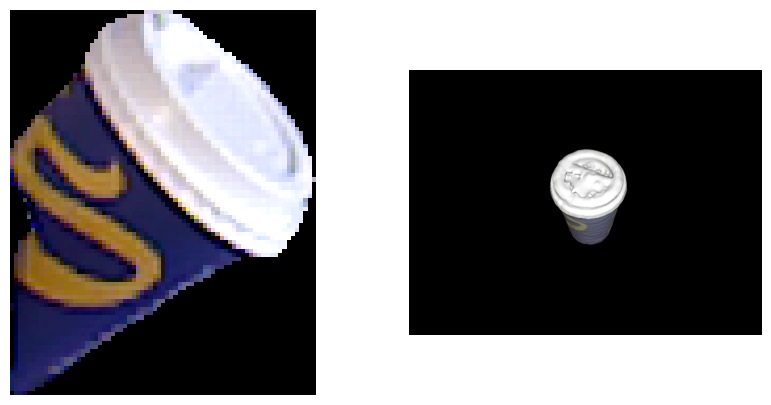

Dissimilarity score: tensor([0.5681])


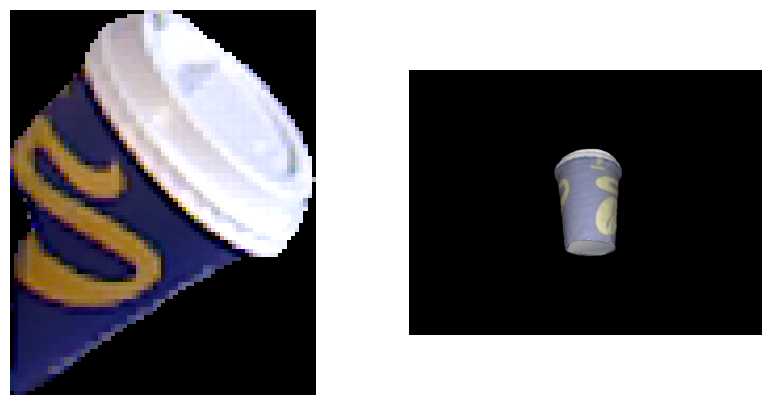

Dissimilarity score: tensor([0.1215])


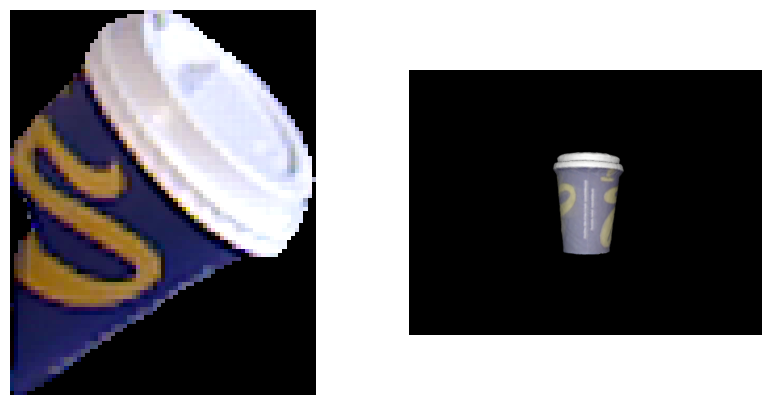

Dissimilarity score: tensor([0.2170])


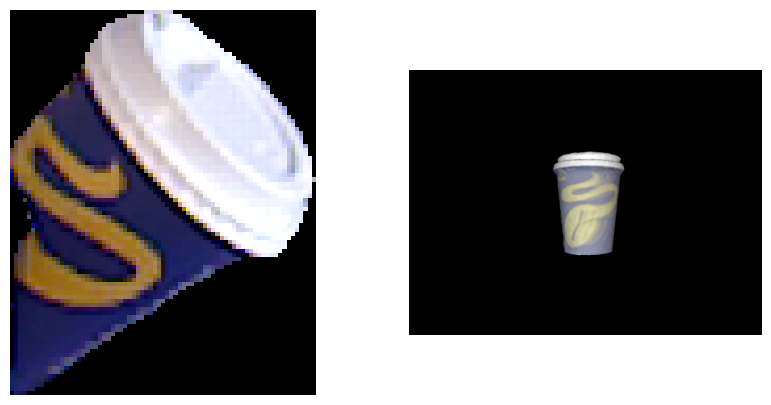

Dissimilarity score: tensor([1.0057])


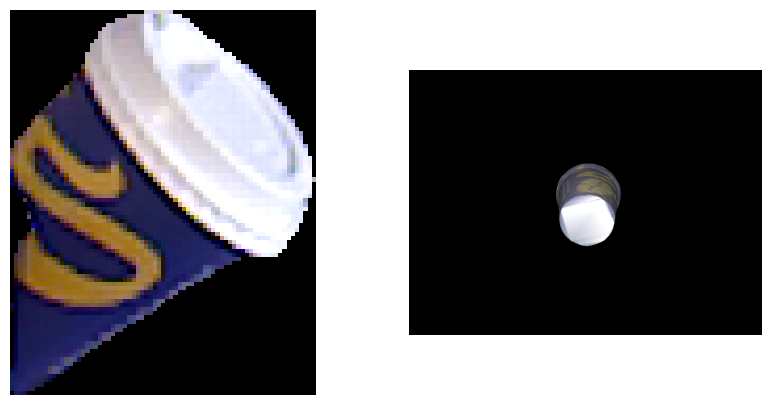

Dissimilarity score: tensor([0.7355])


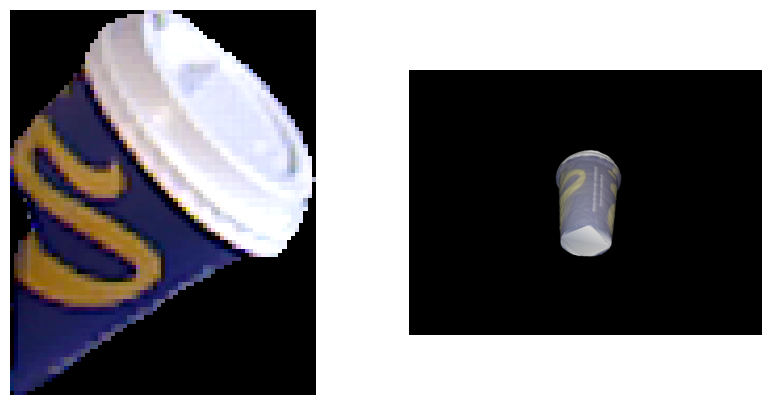

Dissimilarity score: tensor([0.7437])


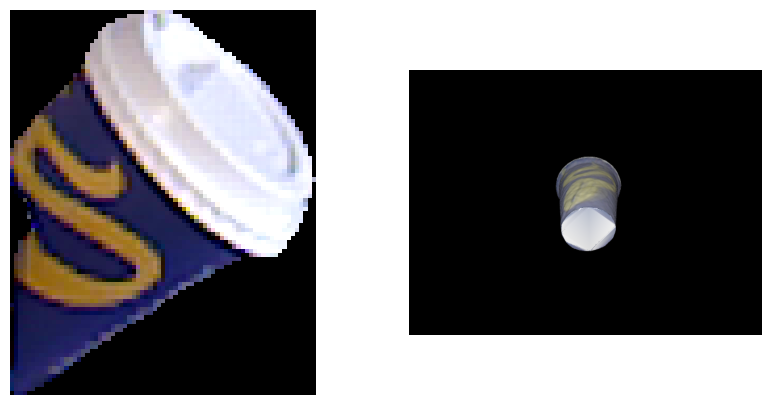

Dissimilarity score: tensor([0.7023])


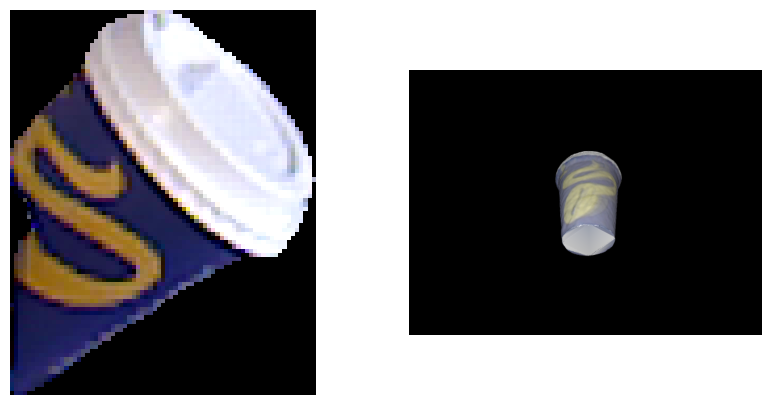

Dissimilarity score: tensor([0.2138])


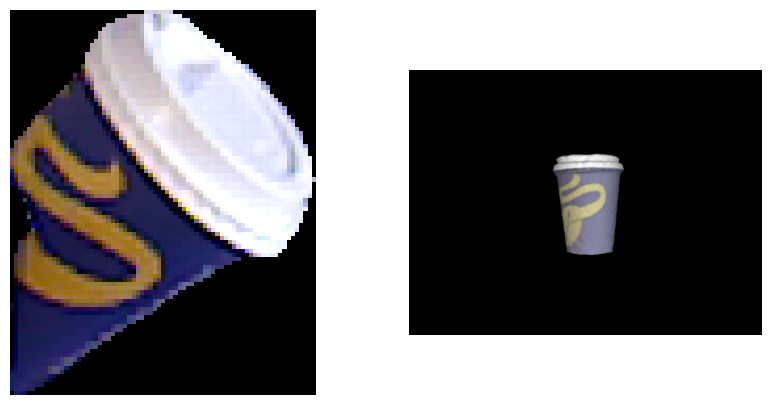

Dissimilarity score: tensor([0.0703])


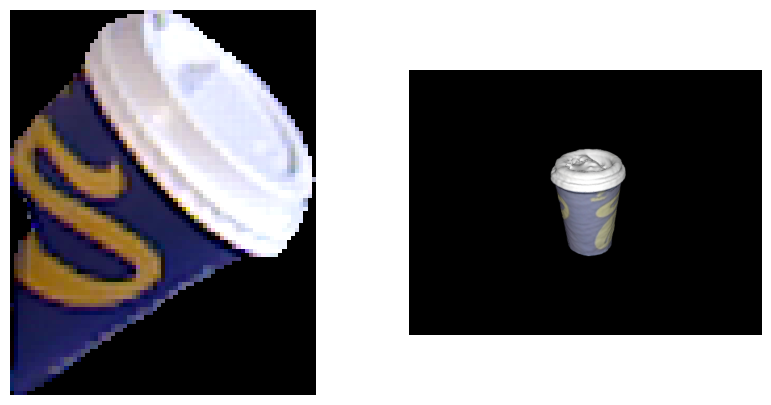

Dissimilarity score: tensor([0.2989])


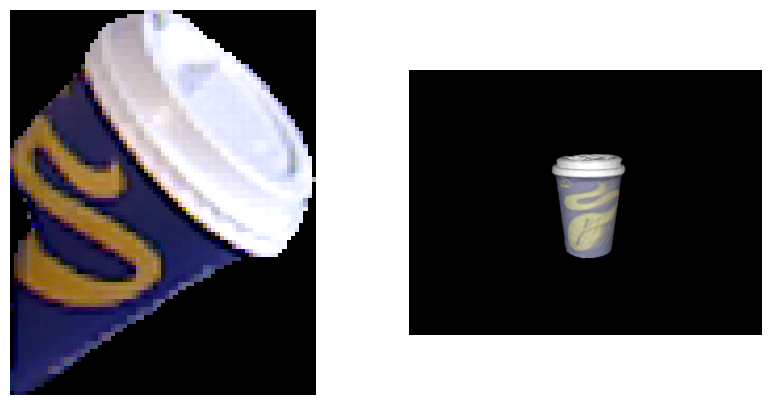

Dissimilarity score: tensor([0.4894])


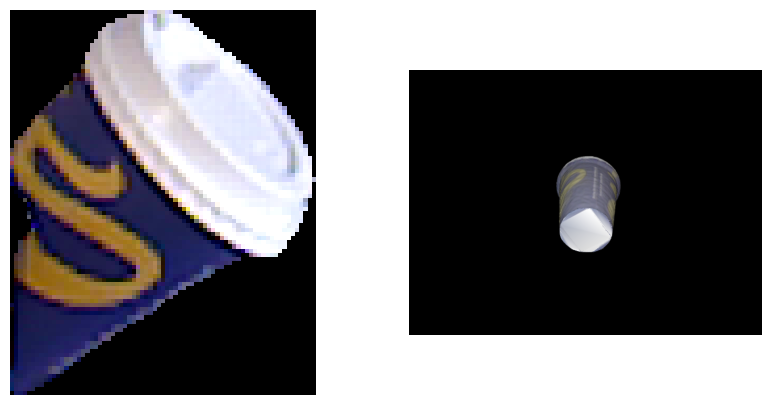

Dissimilarity score: tensor([0.2374])


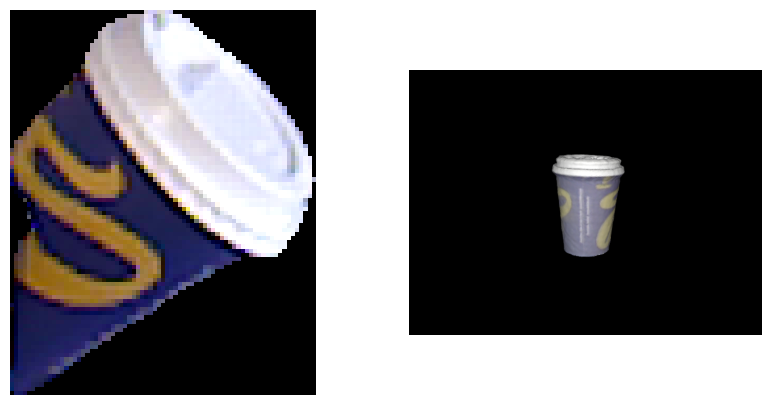

Dissimilarity score: tensor([0.3168])


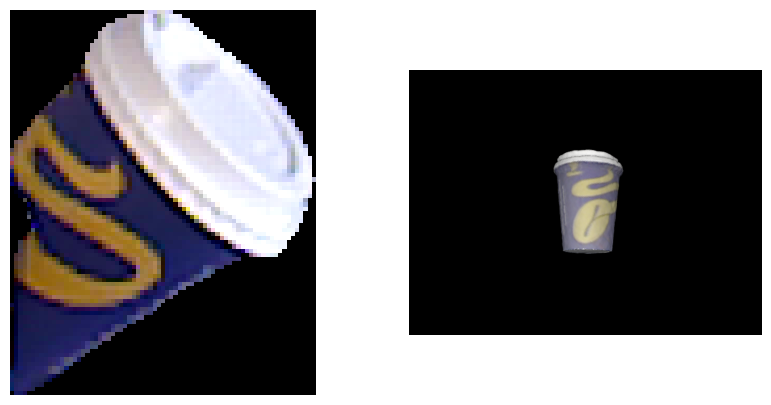

Dissimilarity score: tensor([0.5973])


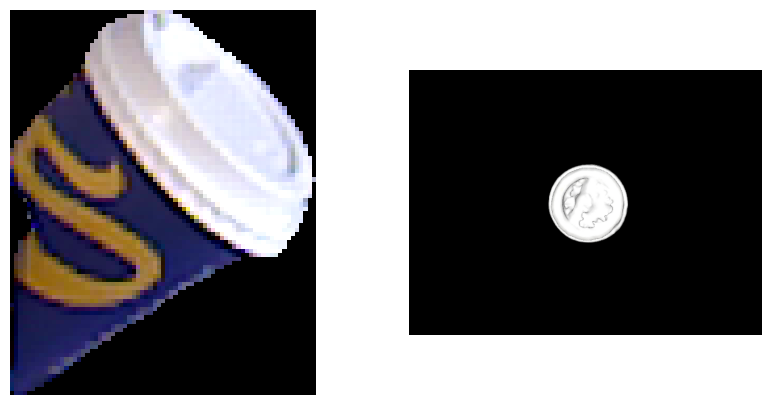

Dissimilarity score: tensor([0.1135])


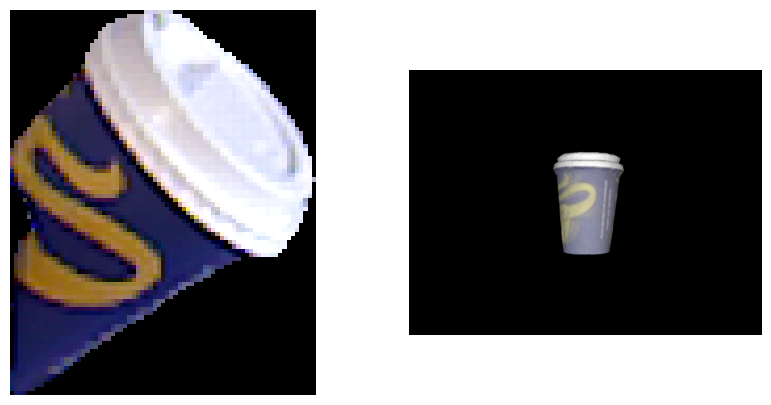

Dissimilarity score: tensor([0.4676])


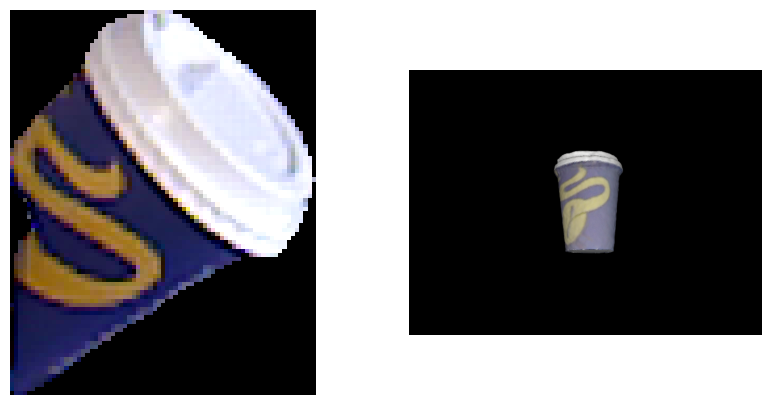

Dissimilarity score: tensor([0.6468])


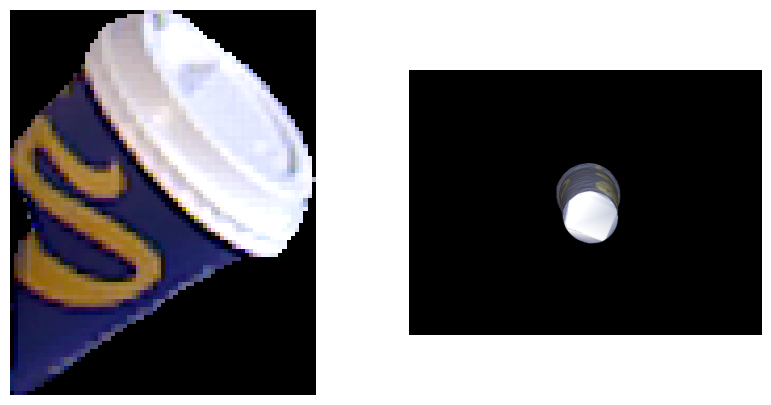

Dissimilarity score: tensor([0.3772])


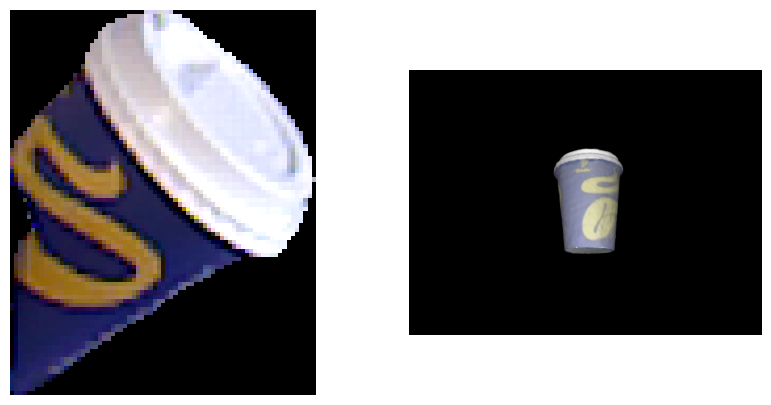

Dissimilarity score: tensor([0.3897])


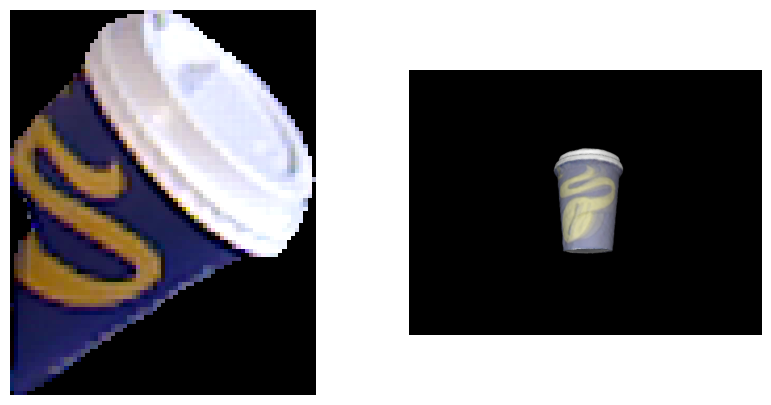

Dissimilarity score: tensor([0.6178])


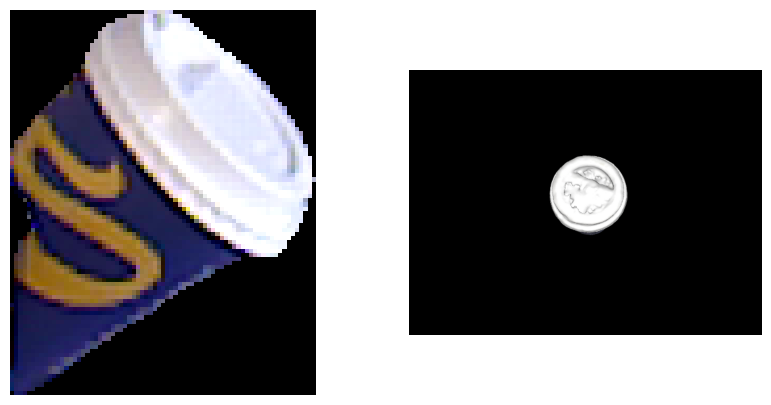

Dissimilarity score: tensor([0.1994])


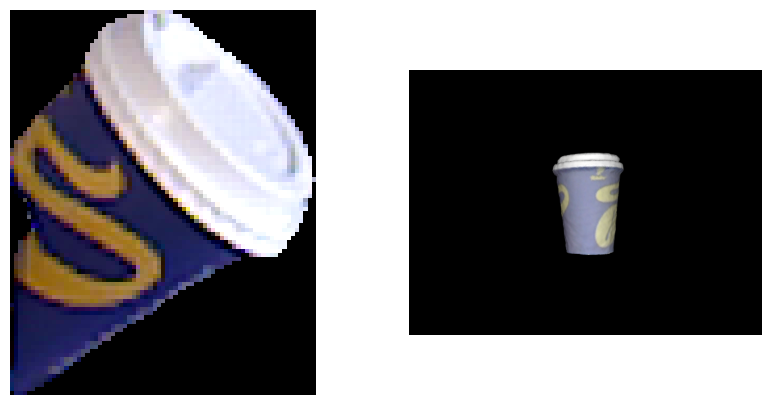

Dissimilarity score: tensor([0.8978])


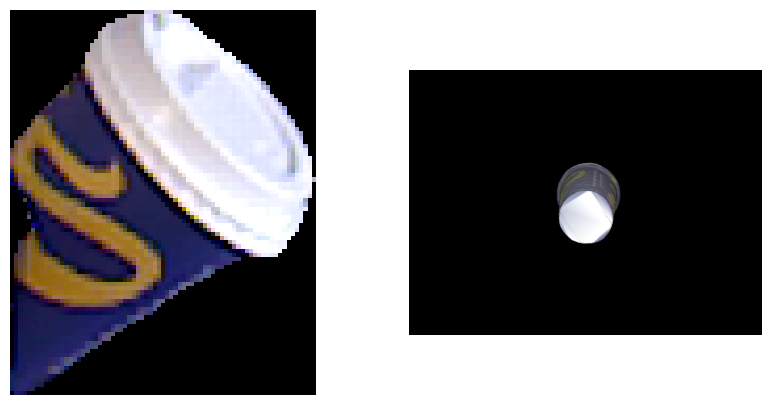

Dissimilarity score: tensor([0.3132])


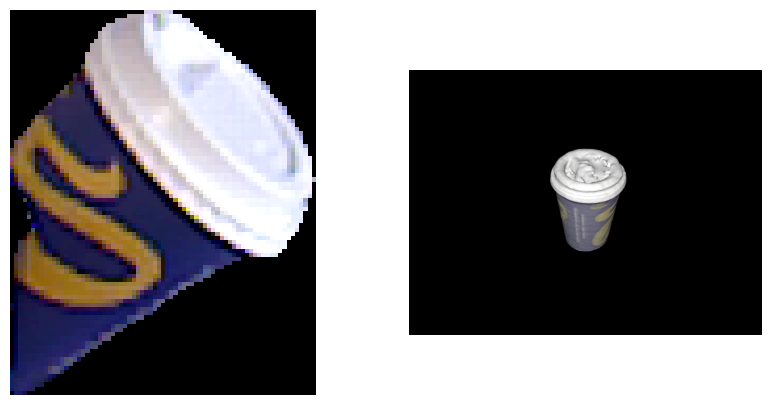

Dissimilarity score: tensor([0.1963])


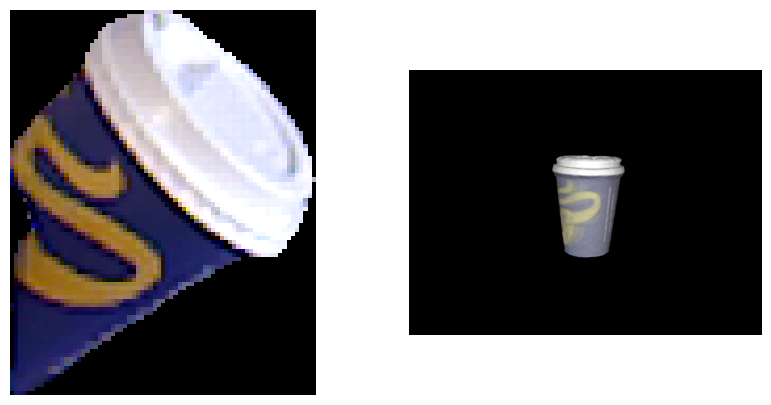

Dissimilarity score: tensor([0.2409])


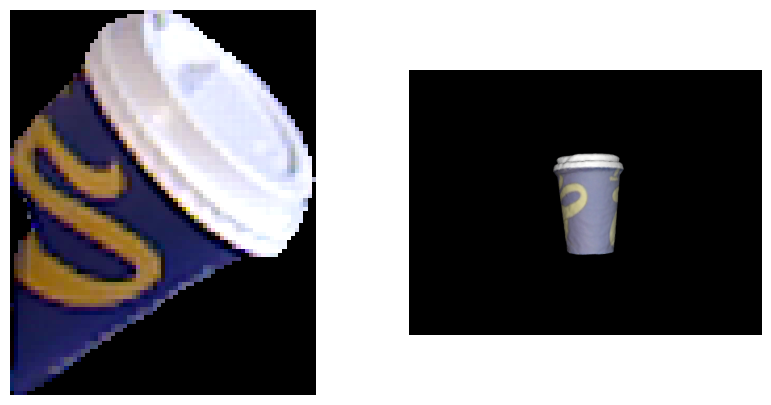

Dissimilarity score: tensor([0.2201])


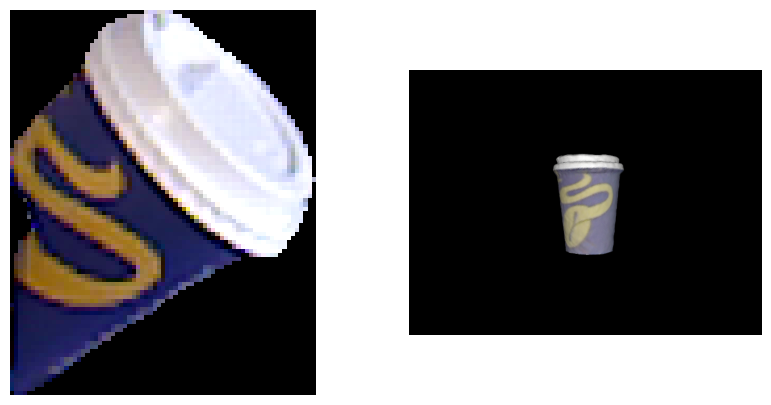

Dissimilarity score: tensor([0.1819])


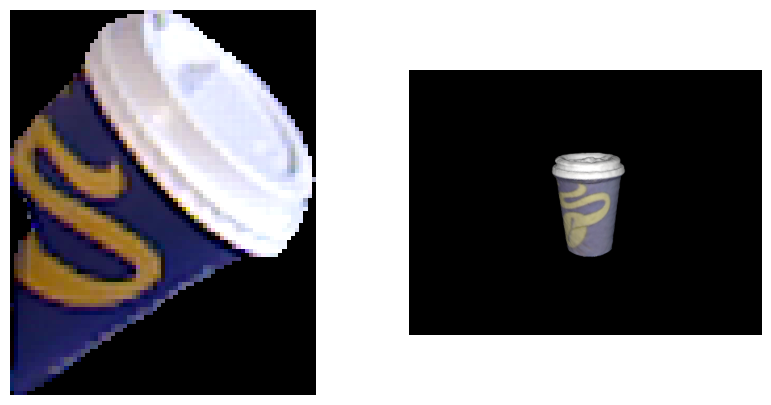

Dissimilarity score: tensor([0.6918])


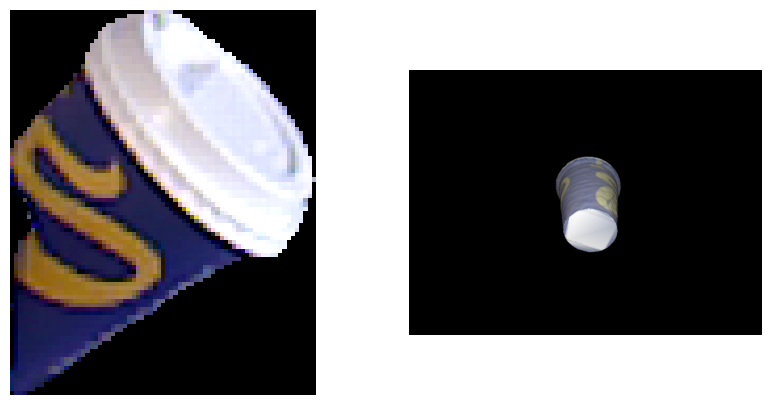

Dissimilarity score: tensor([0.3523])


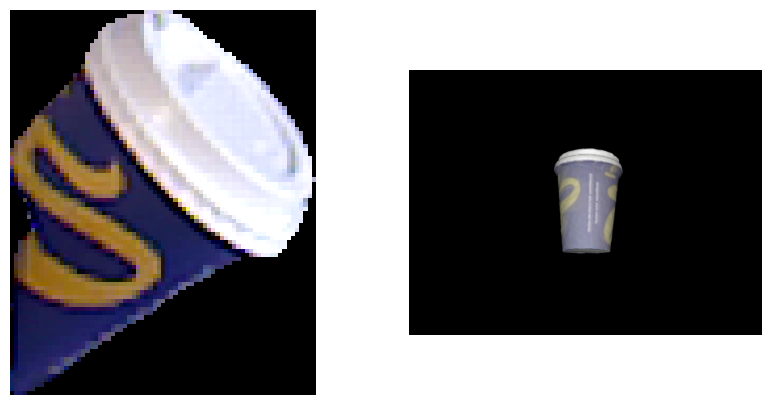

Dissimilarity score: tensor([0.3224])


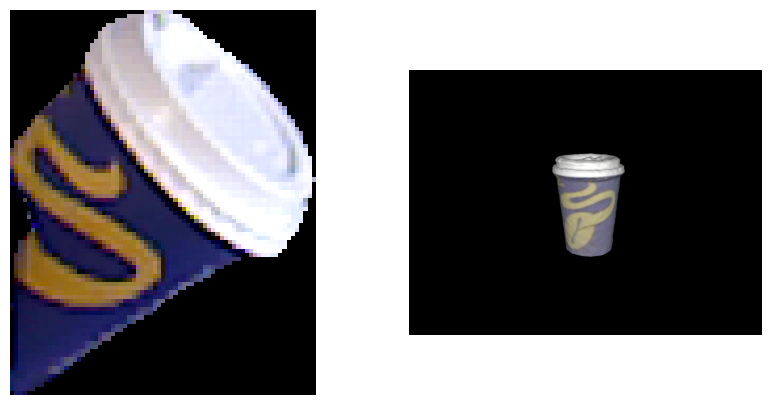

Dissimilarity score: tensor([0.2881])


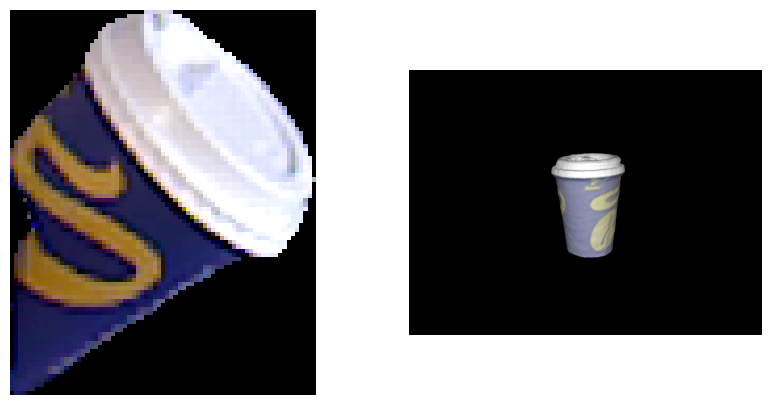

Dissimilarity score: tensor([0.4017])


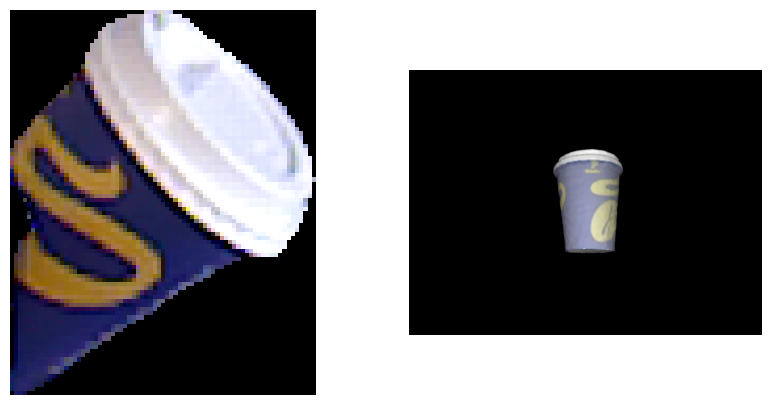

Dissimilarity score: tensor([0.2477])


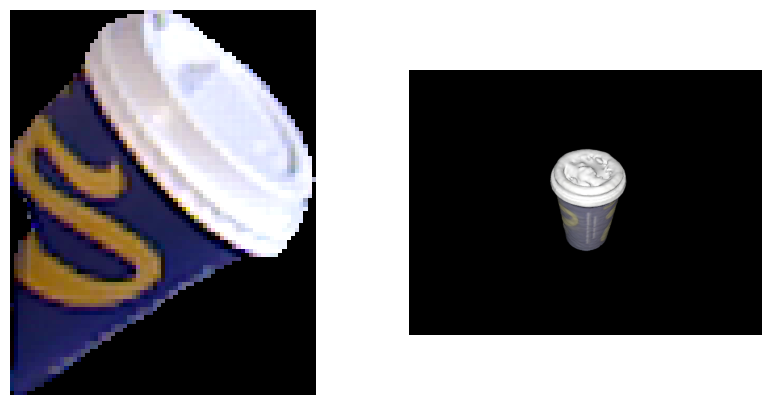

Dissimilarity score: tensor([0.7539])


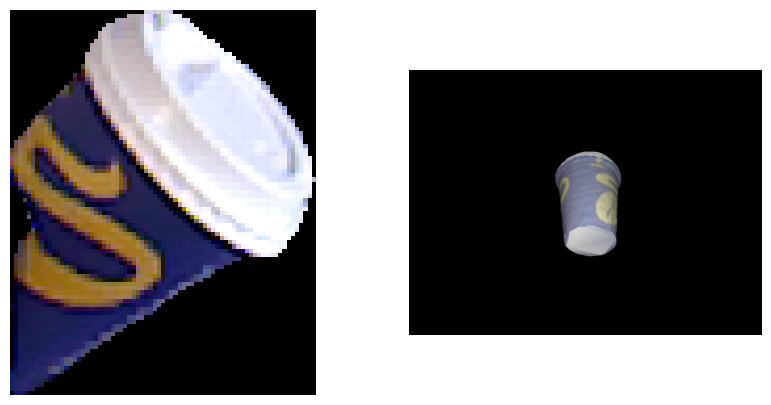

Dissimilarity score: tensor([0.9704])


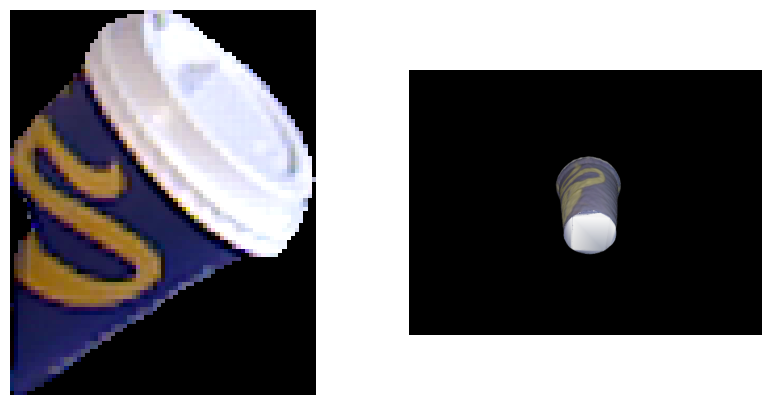

Dissimilarity score: tensor([0.6217])


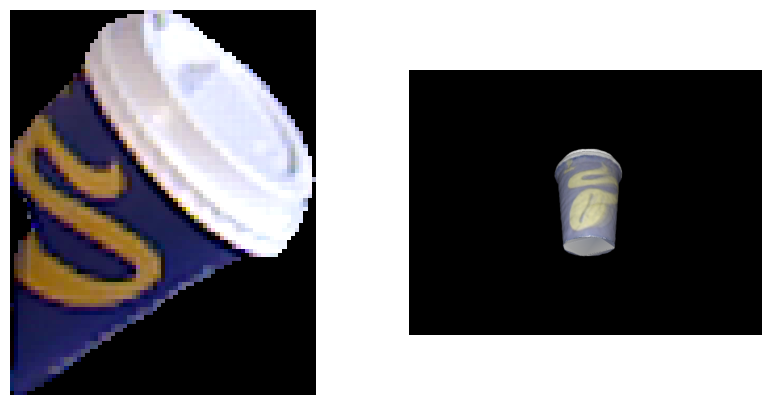

Dissimilarity score: tensor([0.0953])


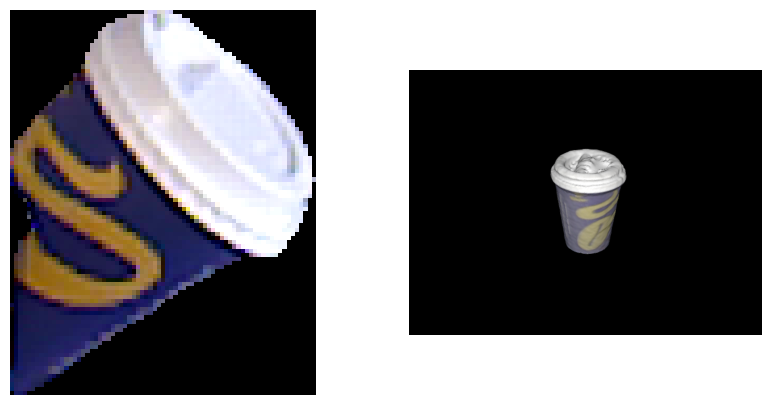

Dissimilarity score: tensor([0.4391])


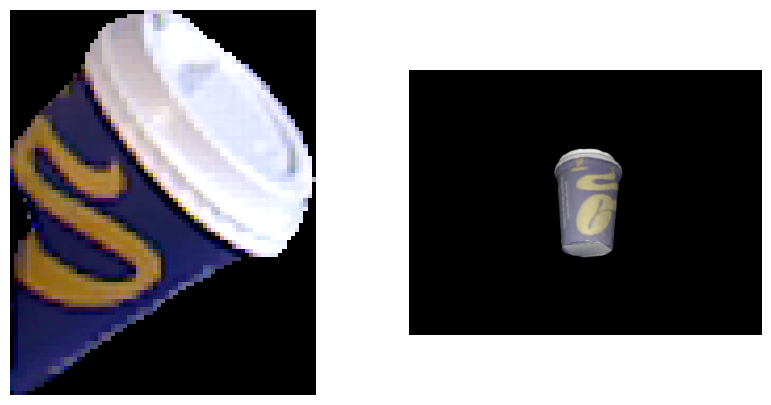

Dissimilarity score: tensor([0.0954])


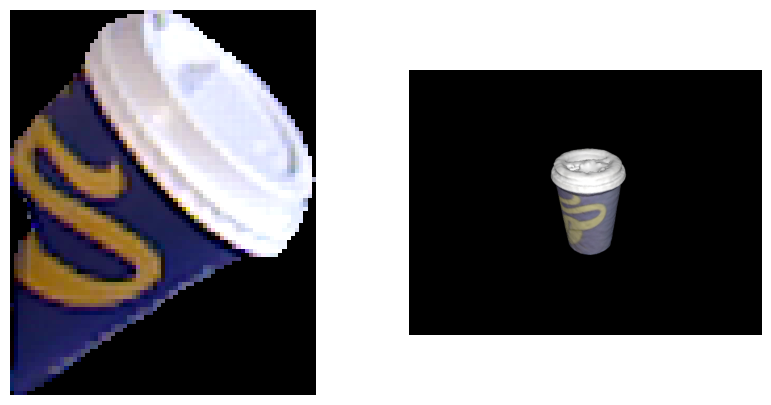

Dissimilarity score: tensor([0.1228])


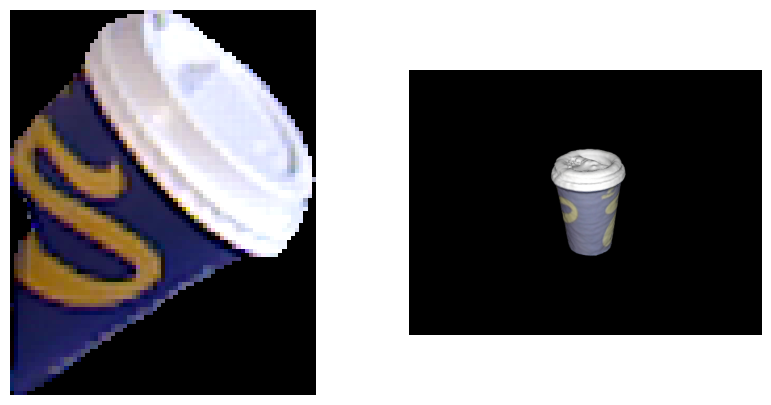

Dissimilarity score: tensor([0.2166])


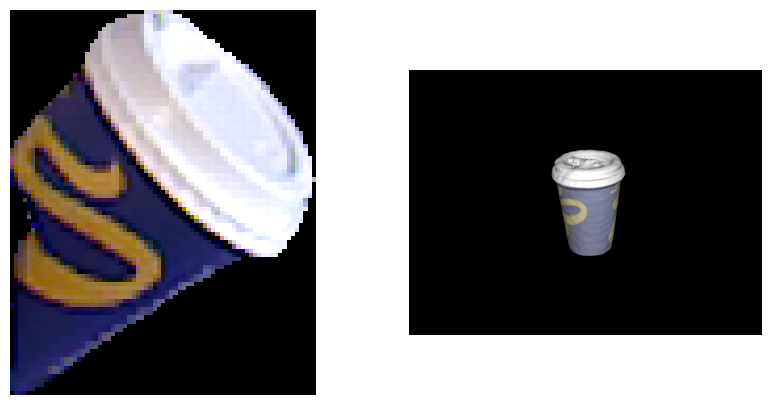

Dissimilarity score: tensor([0.2127])


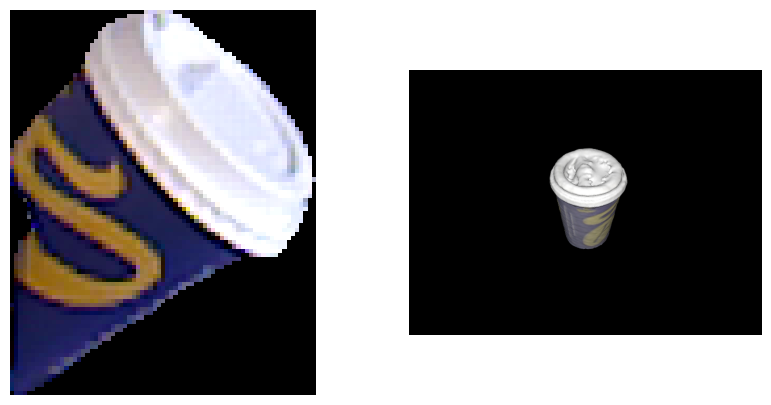

Dissimilarity score: tensor([0.4352])


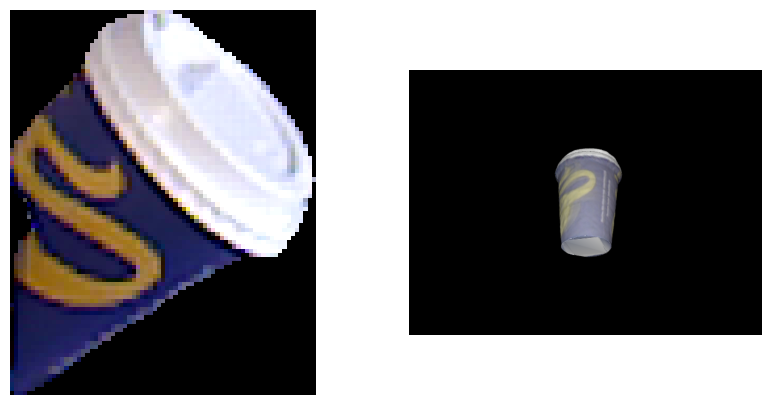

Dissimilarity score: tensor([0.1387])


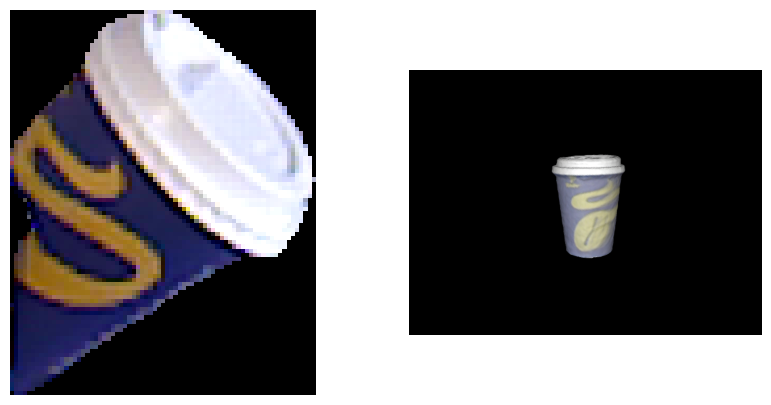

Dissimilarity score: tensor([0.6325])


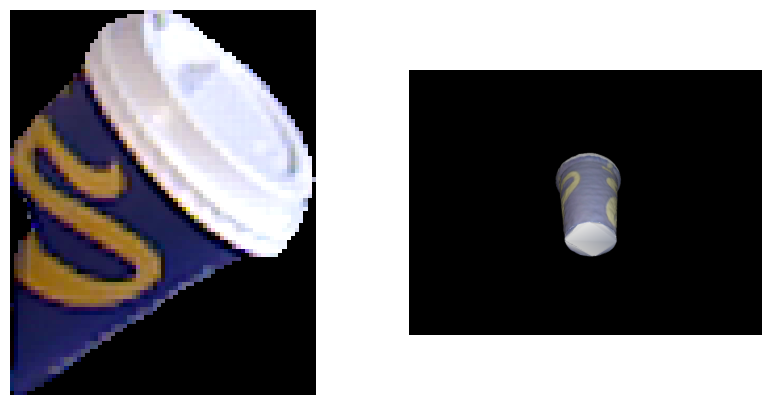

Dissimilarity score: tensor([0.5293])


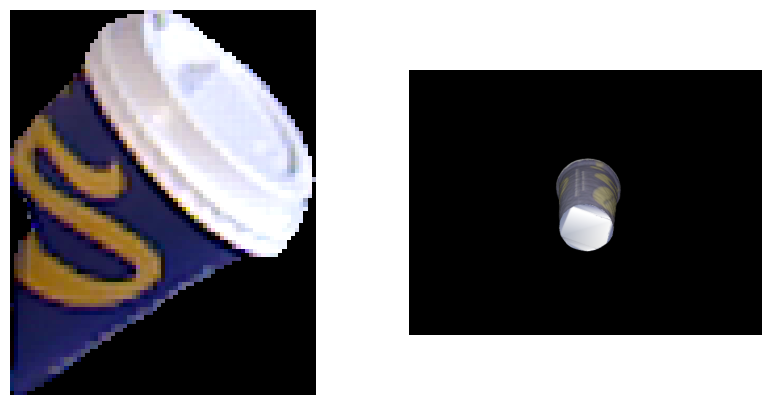

Dissimilarity score: tensor([0.8055])


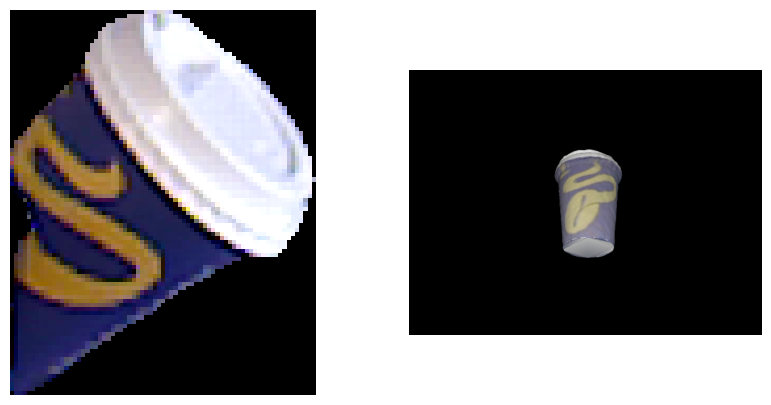

Dissimilarity score: tensor([0.7373])


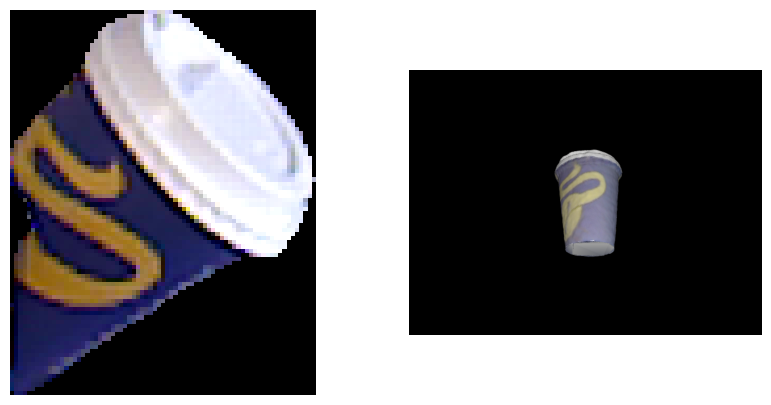

Dissimilarity score: tensor([0.1570])


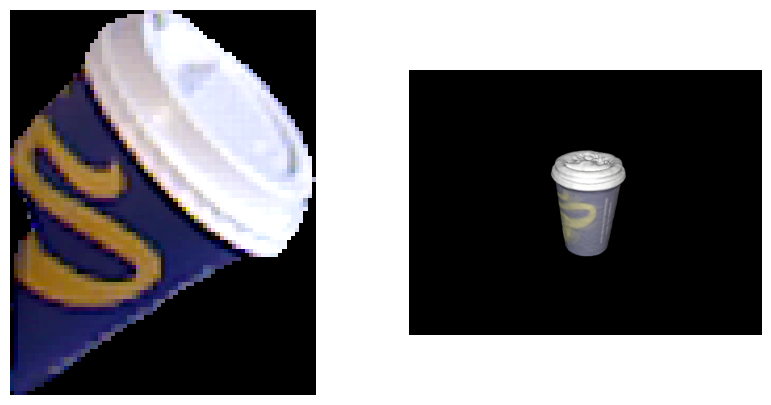

Dissimilarity score: tensor([0.1298])


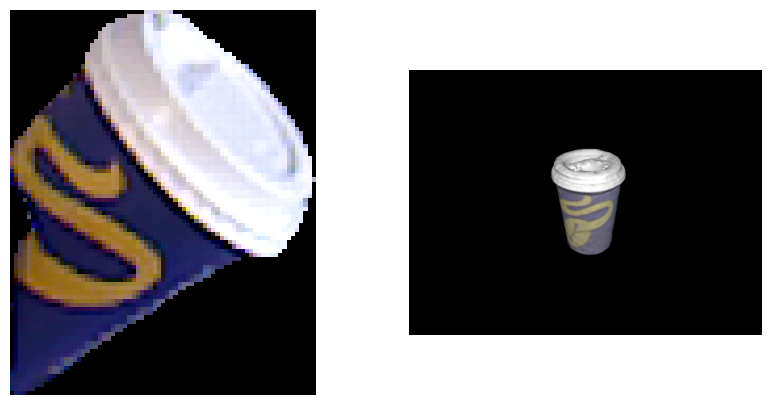

Dissimilarity score: tensor([0.3618])


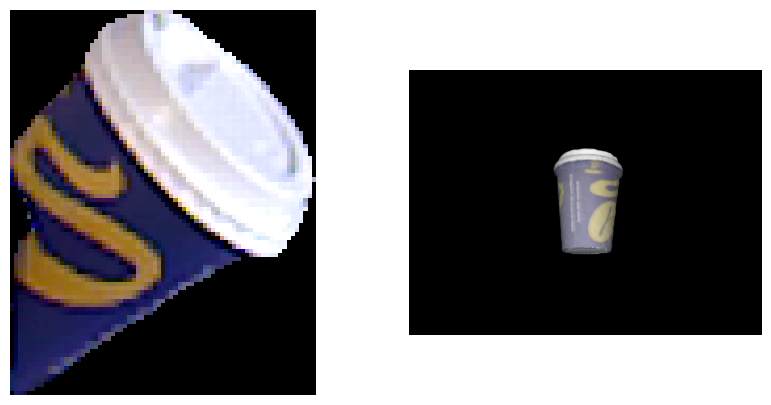

Dissimilarity score: tensor([0.2448])


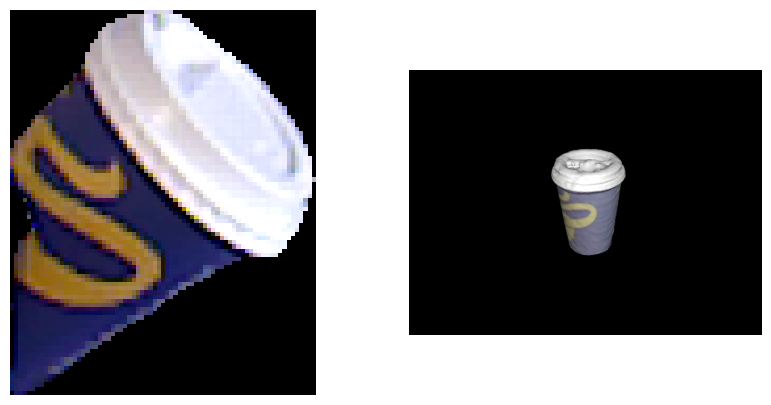

Dissimilarity score: tensor([0.4557])


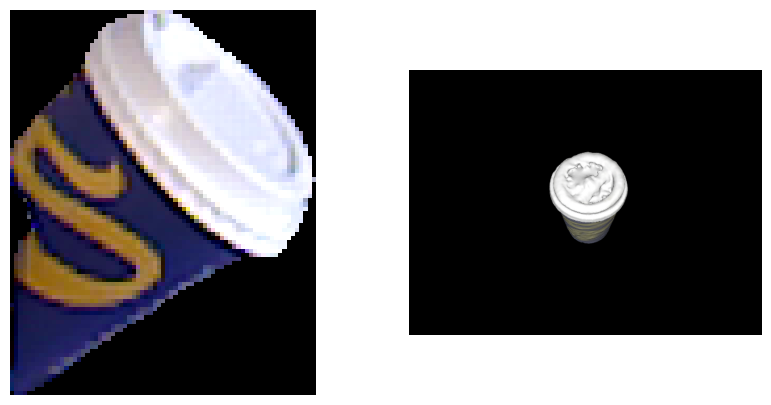

Dissimilarity score: tensor([0.2077])


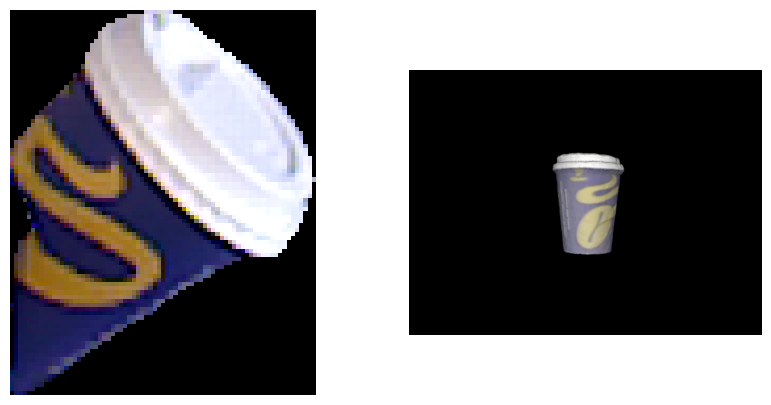

Dissimilarity score: tensor([0.0849])


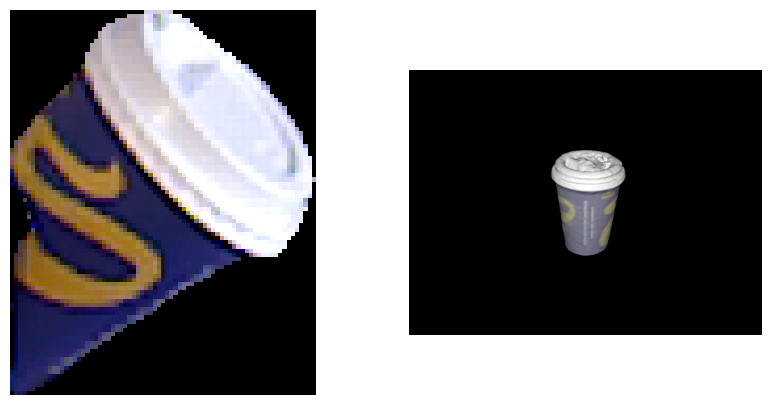

Dissimilarity score: tensor([0.0953])


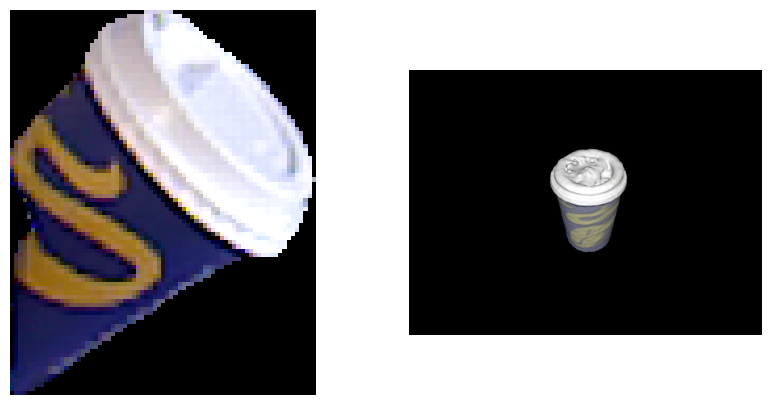

Dissimilarity score: tensor([0.5808])


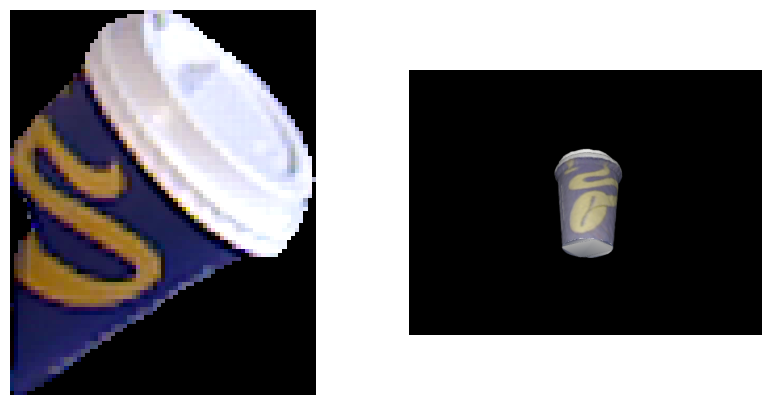

Dissimilarity score: tensor([0.8291])


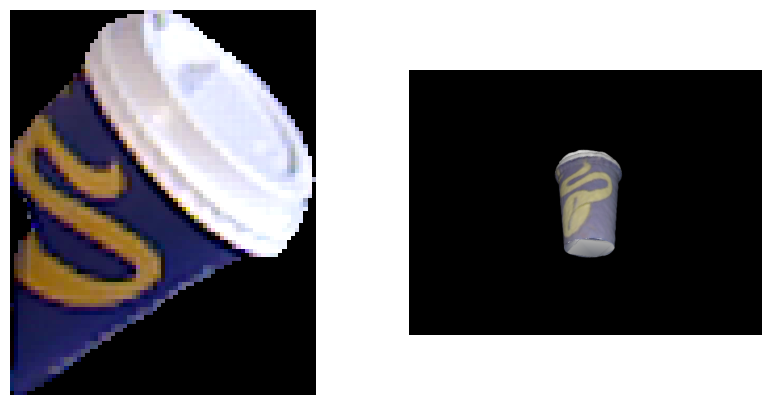

Dissimilarity score: tensor([0.5032])


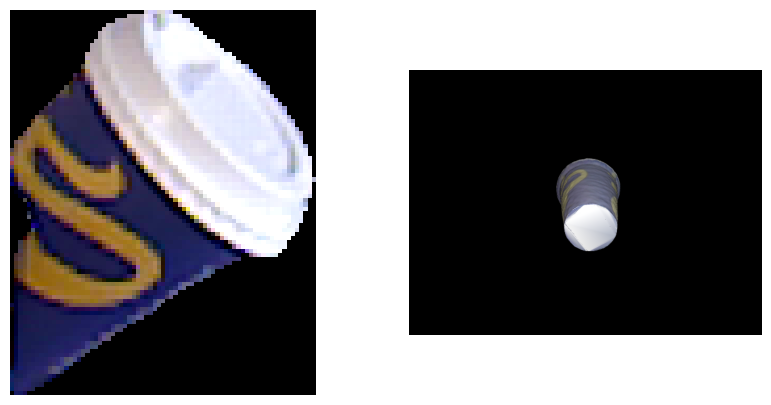

Dissimilarity score: tensor([0.6611])


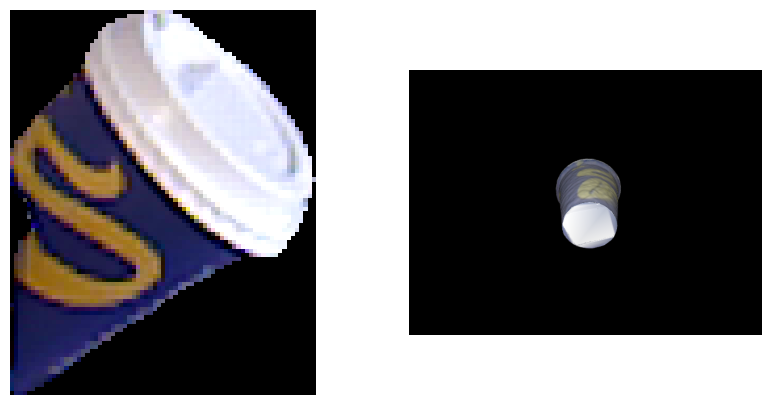

Dissimilarity score: tensor([0.6809])


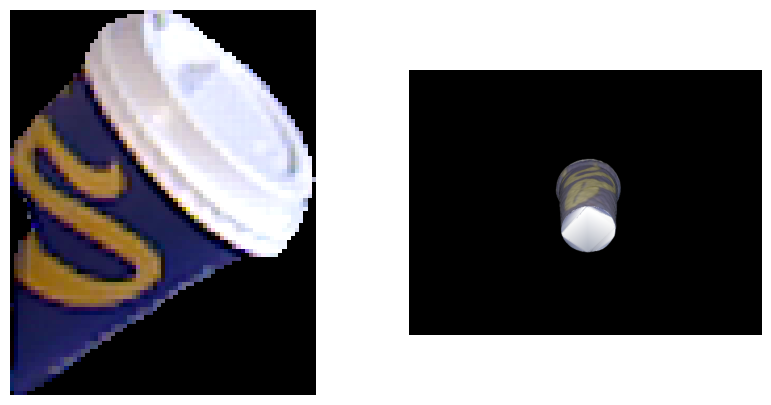

Dissimilarity score: tensor([0.4979])


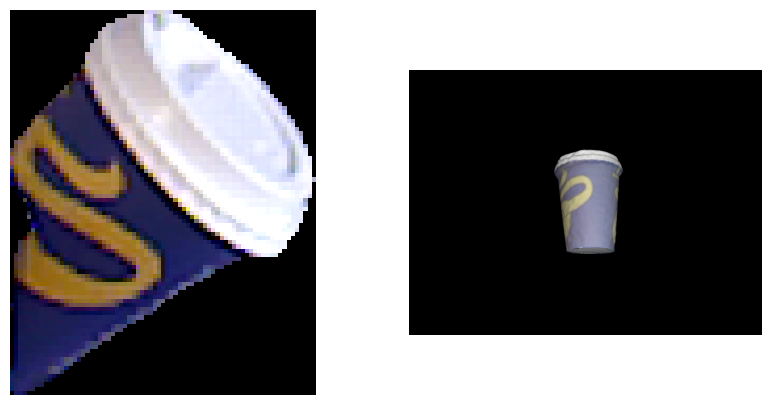

Dissimilarity score: tensor([0.8928])


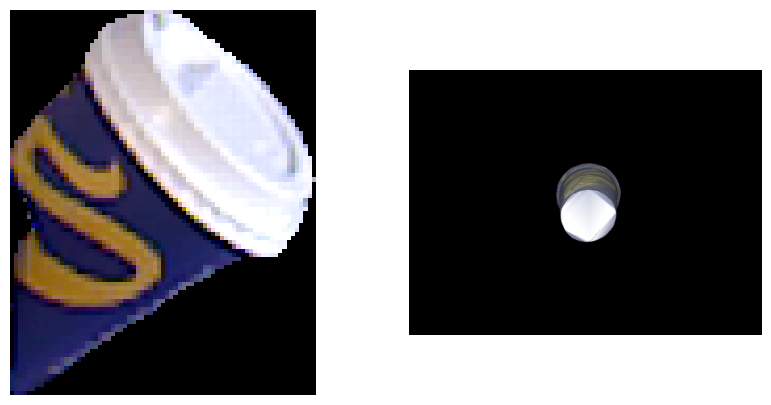

In [11]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn
import glob

from src.model.constrastive_learning import ContrastiveLoss, ContrastiveModel, resize_and_pad_image


transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ]
    )

model = ContrastiveModel(device)
model.load_state_dict(torch.load("contrastive_learning/saved_checkpoints/model_checkpoint35.pth"))
model = model.to(device)
criterion = ContrastiveLoss()

template_paths = glob.glob("datasets/bop23_challenge/datasets/templates_pyrender/icbin/obj_000001/*.png")
templates = [np.array(Image.open(template_path).convert("RGB"))[:,:,:3]/255.0 for template_path in template_paths]

proposal = np.array(pos[5]["rgb"])
img1 = resize_and_pad_image(transform(proposal), target_max=224).unsqueeze(0).float().to(device)

for i, temp in enumerate(templates):
    img2 = resize_and_pad_image(transform(temp), target_max=224).unsqueeze(0).float().to(device)

    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        test_loss = 0.0
        
        output1_test, output2_test = model(img1), model(img2)
        euclidean_distance = nn.functional.pairwise_distance(output1_test, output2_test).cpu().detach()
        
        print(f"Dissimilarity score: {euclidean_distance}")
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(proposal)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(temp)
        plt.axis('off')

        plt.show()
        # neg_class = criterion(output1_test, output2_test, 0)
        # pos_class = criterion(output1_test, output2_test, 1)
        
        # print(f"neg_class : {neg_class}, pos_class: {pos_class}")
        # if neg_class>0.5 and pos_class>0.5:
        #     print(" Not able to identify - wrong case")
        # if neg_class<0.5 and pos_class<0.5:
        #     print(" Not able to identify - wrong case")
        # elif neg_class>0.5:
        #     print("proposal is negative")
        # elif pos_class>0.5:
        #     print("proposal is positive")

index 0


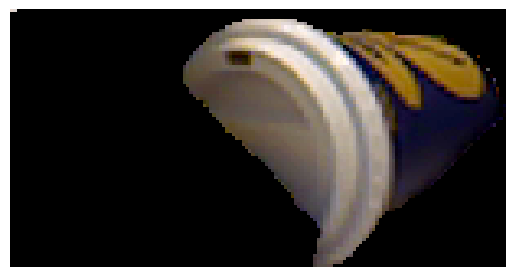

index 1


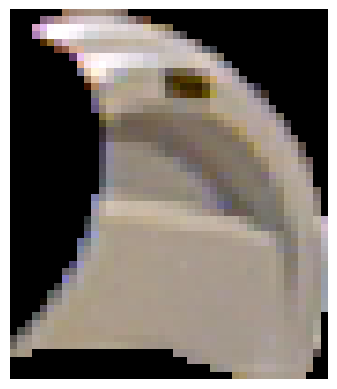

index 2


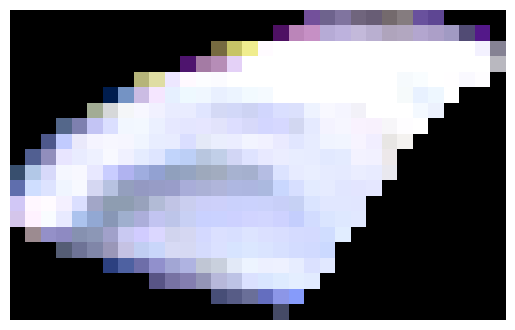

index 3


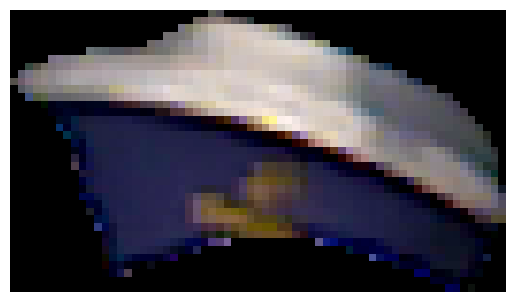

index 4


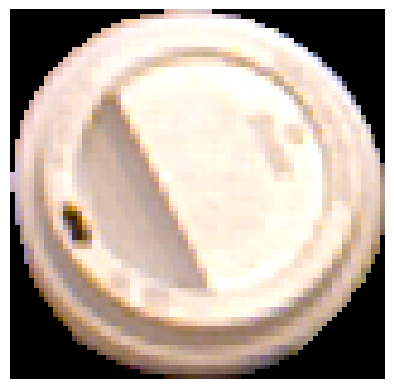

index 5


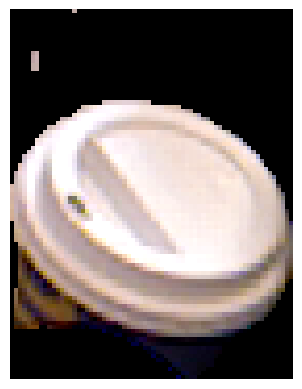

index 6


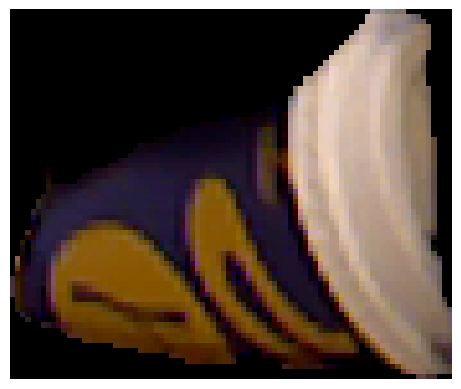

index 7


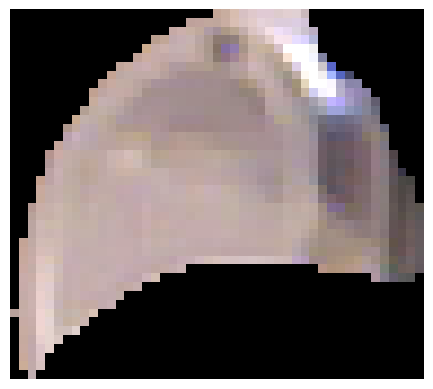

index 8


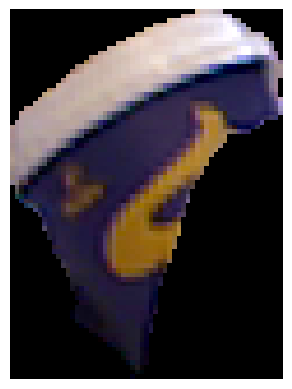

index 9


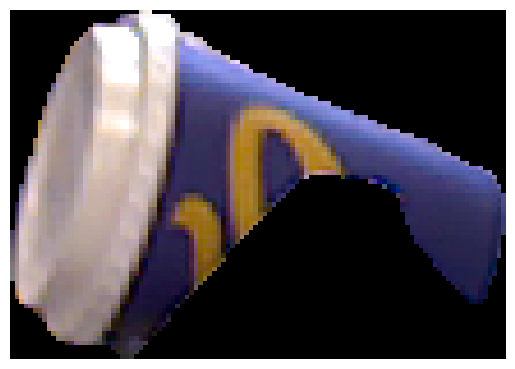

index 10


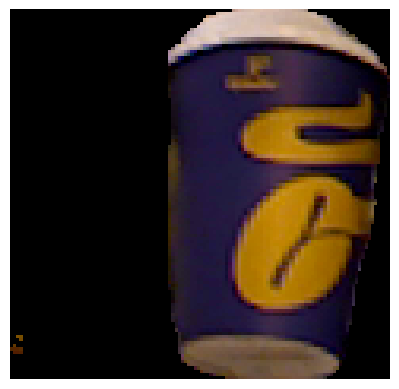

index 11


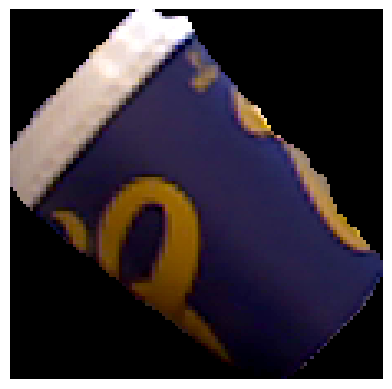

index 12


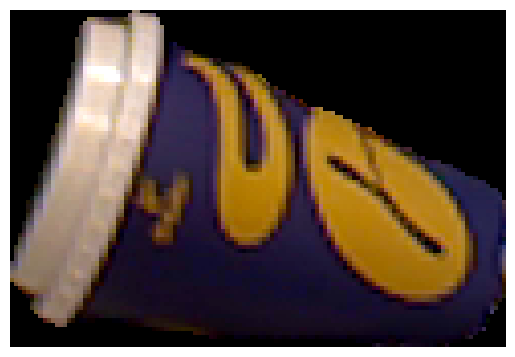

index 13


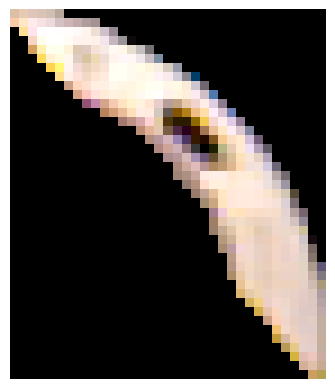

index 14


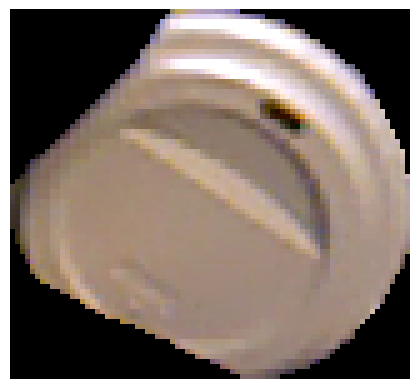

index 15


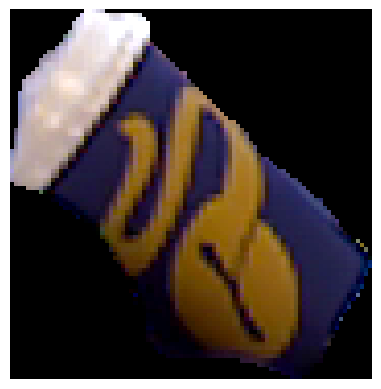

index 16


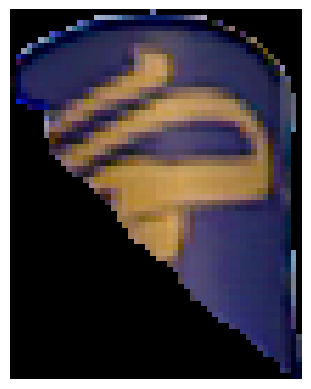

index 17


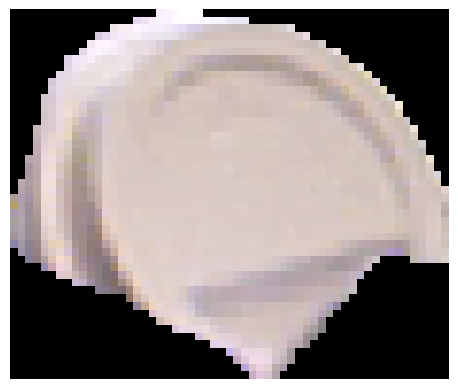

index 18


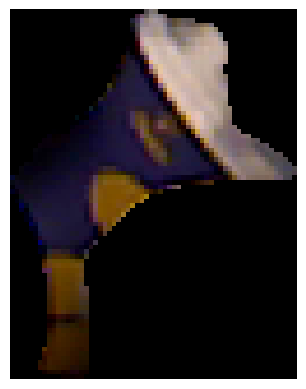

index 19


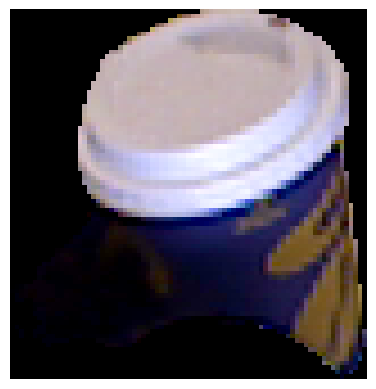

index 20


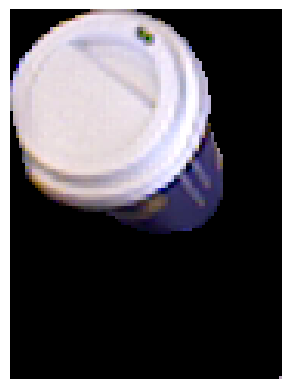

index 21


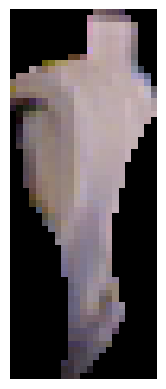

index 22


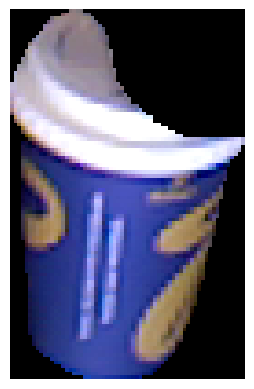

index 23


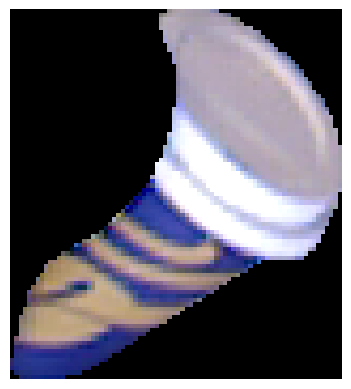

index 24


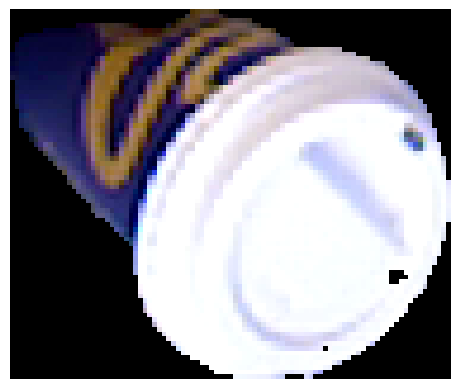

index 25


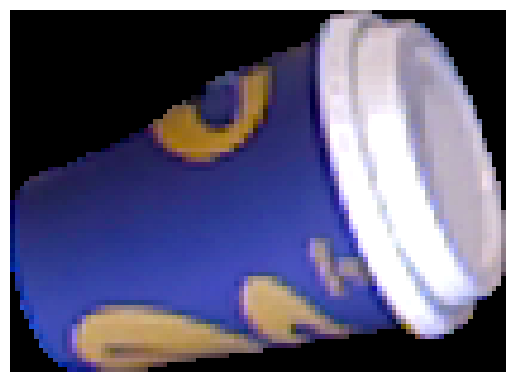

index 26


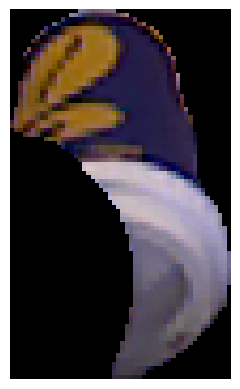

index 27


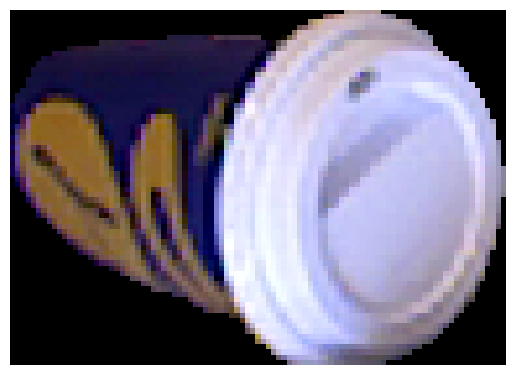

index 28


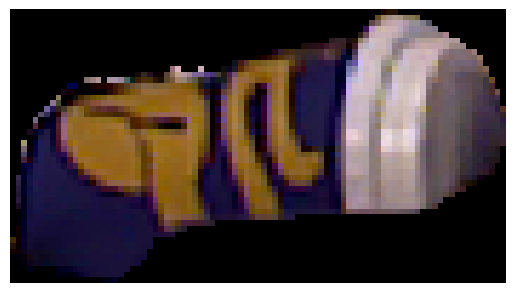

index 29


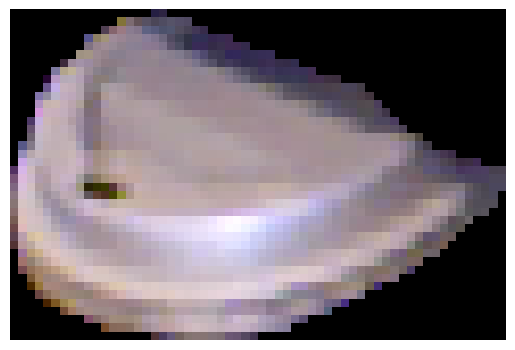

index 30


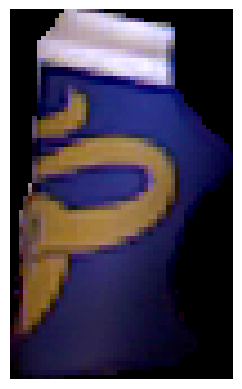

index 31


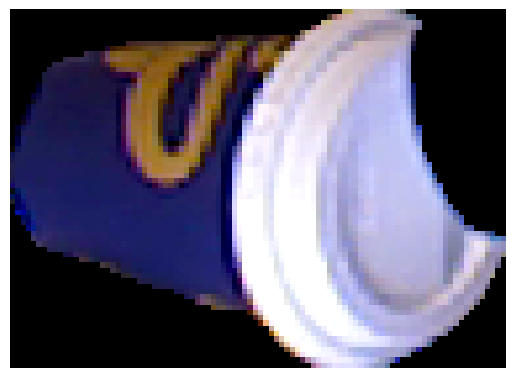

index 32


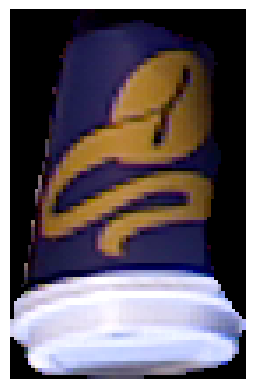

index 33


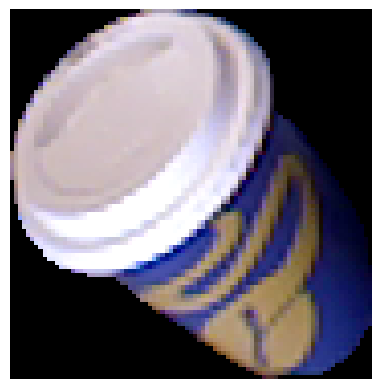

index 34


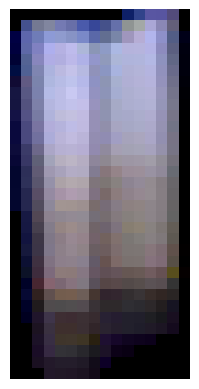

index 35


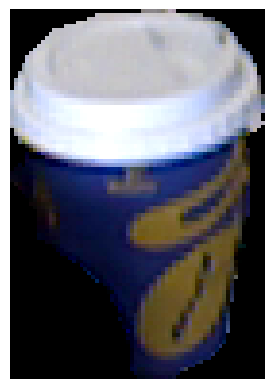

index 36


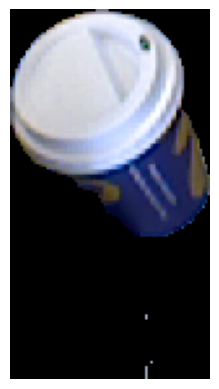

index 37


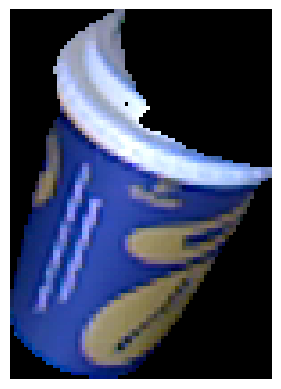

index 38


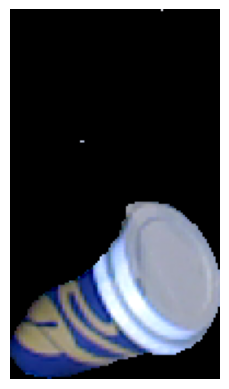

index 39


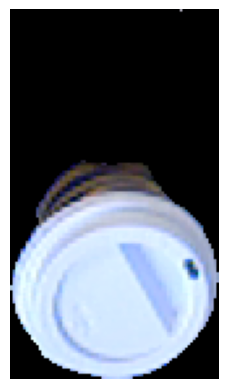

index 40


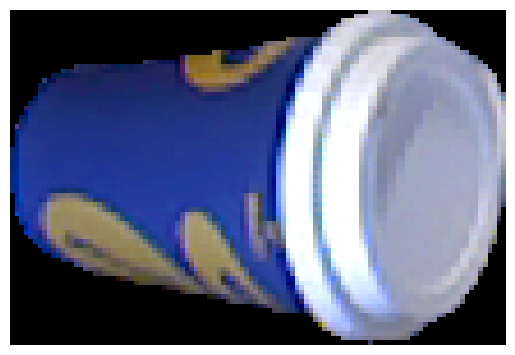

index 41


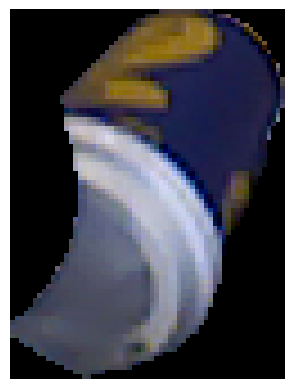

index 42


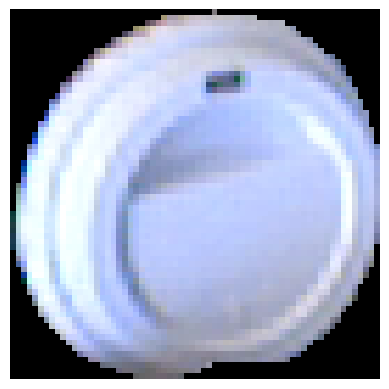

index 43


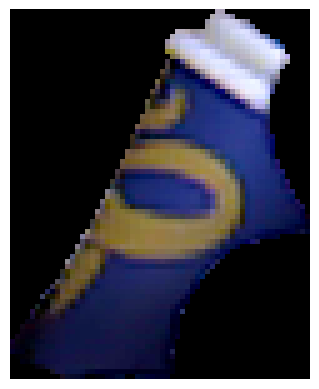

index 44


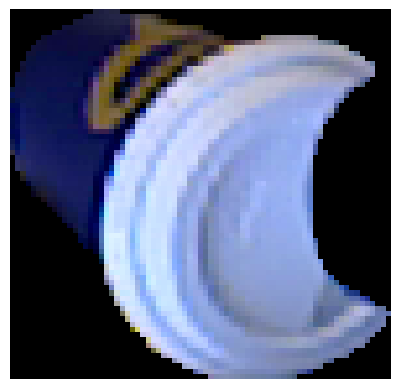

In [62]:
for i, proposal in enumerate(pos[45:90]):
    proposal = np.array(proposal["rgb"])
    print("index", i)
    plt.imshow(proposal)
    plt.axis('off')  # Optional: Turn off the axis
    plt.show()

In [48]:
neg_class = criterion(output1_test, output2_test, 0)
pos_class = criterion(output1_test, output2_test, 1)

In [51]:
neg_class

tensor(0.6837, device='cuda:0')

In [35]:
# import matplotlib.pyplot as plt
# plt.imshow(templates["rgb"][0])
# template_paths

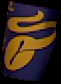

In [102]:
all_neg_proposals[2]

# 7. Nhap

In [4]:
import torch.nn as nn
class ContrastiveLoss2(nn.Module):
    def __init__(self, margin=1.0):
        super().__init__() 
        self.margin = margin

    def forward(self, output1, output2, label):
        # Calculate Euclidean distance
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        # Calculate loss
        loss_contrastive = torch.mean(
            label * torch.pow(euclidean_distance, 2) +
            (1 - label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)
        ) # without means it return size (B) as score for each pair in img1 and img2

        return loss_contrastive

loss = ContrastiveLoss2()

import torch

img1 = torch.randn(4,1024)
img2 = torch.randn(4,1024)
label = torch.tensor([1,0,0,0])

l = loss(img1, img2, label)

In [3]:
l

tensor(540.8006)

In [ ]:
# def pose_similarity(given_pose, poses):
#     R_given, t_given = np.array(given_pose[:3, :3]), np.array(given_pose[:3, 3])
#     similarities = []

#     for idx, pose in enumerate(poses):
#         R, t = np.array(pose[:3, :3]), np.array(pose[:3, 3])
        
#         # Calculate Euclidean distance for translation
#         translation_dist = np.linalg.norm(t_given - t)
        
#         # Calculate Frobenius norm for rotation
#         rotation_dist = np.linalg.norm(R_given - R, ord='fro')

#         # Total similarity measure (you can adjust the weights if needed)
#         total_dist = translation_dist + rotation_dist
#         similarities.append((total_dist, idx))

#     # Sort by similarity (lower distance means more similar)
#     similarities.sort()

#     return similarities

# given_pose = pos_proposals[0][0]["pose"]
# poses = templates["poses"]
# similarity_scores = pose_similarity(given_pose, poses)
# top_5_similar = similarity_scores[:5]

In [ ]:
# from scipy.spatial.distance import cdist
# from scipy.spatial.transform import Rotation
# import matplotlib.pyplot as plt

# def compute_inplane(rot_query_openCV, rot_template_openCV):
#     delta = rot_template_openCV.dot(rot_query_openCV.T)
#     inp = extract_inplane_from_pose(delta)
#     # double check to make sure that reconved rotation is correct
#     R_inp = convert_inplane_to_rotation(inp)
#     recovered_R1 = R_inp.dot(rot_template_openCV)
#     err = geodesic_numpy(recovered_R1, rot_query_openCV)
#     if err >= 15:
#         print("WARINING, error of recovered pose is >=15, err=", err)
#     return inp

# def opencv2opengl(cam_matrix_world):
#     transform = np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
#     if len(cam_matrix_world.shape) == 2:
#         return np.matmul(transform, cam_matrix_world)
#     else:
#         transform = np.tile(transform, (cam_matrix_world.shape[0], 1, 1))
#         return np.matmul(transform, cam_matrix_world)

# def extract_inplane_from_pose(pose):
#     inp = Rotation.from_matrix(pose).as_euler("zyx", degrees=True)[0]
#     return inp

# def convert_inplane_to_rotation(inplane):
#     R_inp = Rotation.from_euler("z", -inplane, degrees=True).as_matrix()
#     return R_inp

# def geodesic_numpy(R1, R2):
#     theta = (np.trace(R2.dot(R1.T)) - 1) / 2
#     theta = np.clip(theta, -1, 1)
#     return np.degrees(np.arccos(theta))

# def extract_positive_pairs(all_pos_proposals)
#     pos_pairs = list()
#     for proposals_id in range(len(all_pos_proposals)):
#         obj_query_pose = all_pos_proposals[proposals_id]["pose"][None]
#         obj_template_poses = templates["poses"]

#         return_inplane = True

#         obj_query_openGL_pose = opencv2opengl(obj_query_pose)
#         obj_query_openGL_location = obj_query_openGL_pose[:, 2, :3]  # Mx3 # (translation components) -  It assumes that the 3D location is found in the third column of the pose matrices.
#         obj_template_openGL_poses = opencv2opengl(obj_template_poses)
#         obj_template_openGL_locations = obj_template_openGL_poses[:, 2, :3]  # Nx3 # (translation components)

#         # find the nearest template
#         # It computes the pairwise distances between each query pose location and each template pose location using cdist.
#         distances = cdist(obj_query_openGL_location, obj_template_openGL_locations)
#         best_index_in_pose_distribution = np.argmin(distances, axis=-1)  # M
#         if return_inplane:
#             nearest_poses = obj_template_poses[best_index_in_pose_distribution]
#             inplanes = np.zeros(len(obj_query_pose))
#             for idx in range(len(obj_query_pose)):
#                 rot_query_openCV = obj_query_pose[idx, :3, :3]
#                 rot_template_openCV = nearest_poses[idx, :3, :3]
#                 inplanes[idx] = compute_inplane(rot_query_openCV, rot_template_openCV)
#         #     return self.avail_index[best_index_in_pose_distribution], inplanes #  self.avail_index is just the index from 0 to 42

#         pos_pair = {
#             "img1" : templates["rgb"][best_index_in_pose_distribution[0]],
#             "img2" : all_pos_proposals[proposals_id]["rgb"],
#             "label" : 1
#         }
#         pos_pairs.append(pos_pair)
#         # plt.figure(figsize=(10, 5))
#         # plt.subplot(1, 2, 1)
#         # plt.imshow(templates["rgb"][best_index_in_pose_distribution[0]])
#         # plt.axis('off')

#         # plt.subplot(1, 2, 2)
#         # plt.imshow(all_pos_proposals[proposals_id]["rgb"])
#         # plt.axis('off')

#         # plt.show()
#     return pos_pairs